In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
import matplotlib.pyplot as plt

from scipy.stats import zscore, boxcox


from sklearn.preprocessing import LabelEncoder, StandardScaler, LabelBinarizer
from sklearn.impute import SimpleImputer
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [4]:
df=pd.read_csv('Customer_retention.csv')
df

1Gender of respondent 2 How old are you?   \
0                    Male         31-40 years   
1                  Female         21-30 years   
2                  Female         21-30 years   
3                    Male         21-30 years   
4                  Female         21-30 years   
5                  Female         31-40 years   
6                    Male         41-50 yaers   
7                    Male         41-50 yaers   
8                  Female  Less than 20 years   
9                  Female         31-40 years   
10                   Male         31-40 years   
11                 Female         41-50 yaers   
12                 Female  51 years and above   
13                 Female         31-40 years   
14                 Female         21-30 years   
15                 Female         21-30 years   
16                   Male         31-40 years   
17                   Male         41-50 yaers   
18                 Female         41-50 yaers   
19                 Female         21-30 years   
20                 Female         21-30 years   
21                   Male         31-40 years   
22                   Male         41-50 yaers   
23                 Female         41-50 yaers   
24                 Female         21-30 years   
25                 Female         21-30 years   
26                   Male         21-30 years   
27                   Male         31-40 years   
28                 Female         41-50 yaers   
29                 Female         41-50 yaers   
30                 Female  Less than 20 years   
31                   Male         31-40 years   
32                   Male         31-40 years   
33                 Female         41-50 yaers   
34                 Female  51 years and above   
35                 Female         21-30 years   
36                   Male         31-40 years   
37                   Male         41-50 yaers   
38                 Female         41-50 yaers   
39                 Female         21-30 years   
40                 Female         21-30 years   
41                   Male         31-40 years   
42                   Male         21-30 years   
43                 Female         21-30 years   
44                 Female         31-40 years   
45                 Female         41-50 yaers   
46                   Male         41-50 yaers   
47                   Male  Less than 20 years   
48                 Female         31-40 years   
49                 Female         31-40 years   
50                 Female         41-50 yaers   
51                   Male  51 years and above   
52                   Male         41-50 yaers   
53                 Female         41-50 yaers   
54                 Female         21-30 years   
55                 Female         21-30 years   
56                   Male         21-30 years   
57                   Male         21-30 years   
58                 Female         31-40 years   
59                 Female         41-50 yaers   
60                 Female         41-50 yaers   
61                   Male  Less than 20 years   
62                   Male         31-40 years   
63                 Female         31-40 years   
64                 Female         41-50 yaers   
65                 Female  51 years and above   
66                   Male         31-40 years   
67                   Male         41-50 yaers   
68                 Female         41-50 yaers   
69                 Female         21-30 years   
70                 Female         21-30 years   
71                   Male         31-40 years   
72                   Male         21-30 years   
73                 Female         21-30 years   
74                 Female         31-40 years   
75                 Female         41-50 yaers   
76                   Male         41-50 yaers   
77                   Male  Less than 20 years   
78                 Female         31-40 years   
79                 Female         31-40 years   
80                 Female         4

In [5]:
df.head()

1Gender of respondent 2 How old are you?   \
0                  Male         31-40 years   
1                Female         21-30 years   
2                Female         21-30 years   
3                  Male         21-30 years   
4                Female         21-30 years   

  3 Which city do you shop online from?  \
0                                 Delhi   
1                                 Delhi   
2                         Greater Noida   
3                               Karnal    
4                            Bangalore    

   4 What is the Pin Code of where you shop online from?  \
0                                             110009       
1                                             110030       
2                                             201308       
3                                             132001       
4                                             530068       

  5 Since How Long You are Shopping Online ?  \
0                              Above 4 years   
1                              Above 4 years   
2                                  3-4 years   
3                                  3-4 years   
4                                  2-3 years   

  6 How many times you have made an online purchase in the past 1 year?  \
0                                        31-40 times                      
1                                 41 times and above                      
2                                 41 times and above                      
3                                 Less than 10 times                      
4                                        11-20 times                      

  7 How do you access the internet while shopping on-line?  \
0                                            Dial-up         
1                                              Wi-Fi         
2                                    Mobile Internet         
3                                    Mobile Internet         
4                                              Wi-Fi         

  8 Which device do you use to access the online shopping?  \
0                                            Desktop         
1                                         Smartphone         
2                                         Smartphone         
3                                         Smartphone         
4                                         Smartphone         

  9 What is the screen size of your mobile device?\t\t\t\t\t\t                                          \
0                                             Others                                                     
1                                         4.7 inches                                                     
2                                         5.5 inches                                                     
3                                         5.5 inches                                                     
4                                         4.7 inches                                                     

  10 What is the operating system (OS) of your device?\t\t\t\t                                            \
0                              Window/windows Mobile                                                       
1                                            IOS/Mac                                                       
2                                            Android                                                       
3                                            IOS/Mac                                                       
4                                            IOS/Mac                                                       

  11 What browser do you run on your device to access the website?\t\t\t                                                            \
0                                      Google chrome                                                                                 
1                                      Google chrome       

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 269 entries, 0 to 268
Data columns (total 71 columns):
 #   Column                                                                                                                                                                                                          Non-Null Count  Dtype 
---  ------                                                                                                                                                                                                          --------------  ----- 
 0   1Gender of respondent                                                                                                                                                                                           269 non-null    object
 1   2 How old are you?                                                                                                                                                                    

In [9]:
df.isnull().sum()

1Gender of respondent                                                                                                                                                                                                  0
2 How old are you?                                                                                                                                                                                                     0
3 Which city do you shop online from?                                                                                                                                                                                  0
4 What is the Pin Code of where you shop online from?                                                                                                                                                                  0
5 Since How Long You are Shopping Online ?                                                                                          

In [10]:
print("Empty rows : ", df[df.isnull().all(axis =1)].index.tolist())

Empty rows :  []


In [11]:
df.shape

(269, 71)

In [12]:
df.dtypes

1Gender of respondent                                                                                                                                                                                                  object
2 How old are you?                                                                                                                                                                                                     object
3 Which city do you shop online from?                                                                                                                                                                                  object
4 What is the Pin Code of where you shop online from?                                                                                                                                                                   int64
5 Since How Long You are Shopping Online ?                                                                      

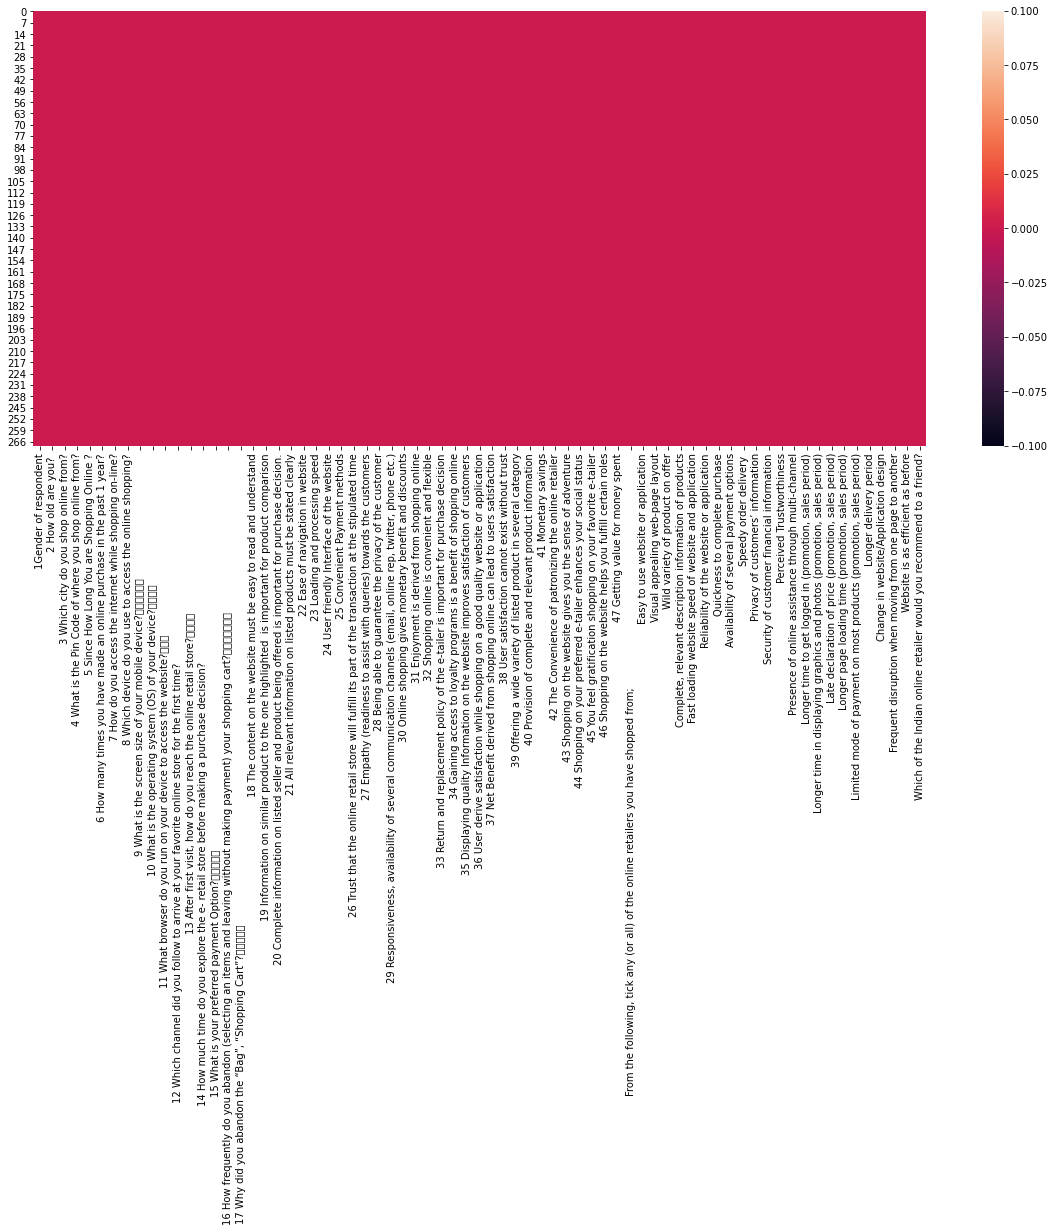

In [14]:
plt.figure(figsize=(20,8))
sns.heatmap(df.isnull())
plt.show()

checking for obj and numerical data

In [15]:
df_obj,df_num=[],[]

for i in df:
    if df[i].dtype=='O':
        df_obj.append(i)
    elif (df[i].dtypes=='int64') | (df[i].dtypes=='float64') | (df[i].dtypes=='int32'):
        df_num.append(i)
    else: continue
        
print('>>> Total Number of Feature::', df.shape[1])
print('>>> Number of categorical features::', len(df_obj))
print('>>> Number of Numerical Feature::', len(df_num))

>>> Total Number of Feature:: 71
>>> Number of categorical features:: 70
>>> Number of Numerical Feature:: 1


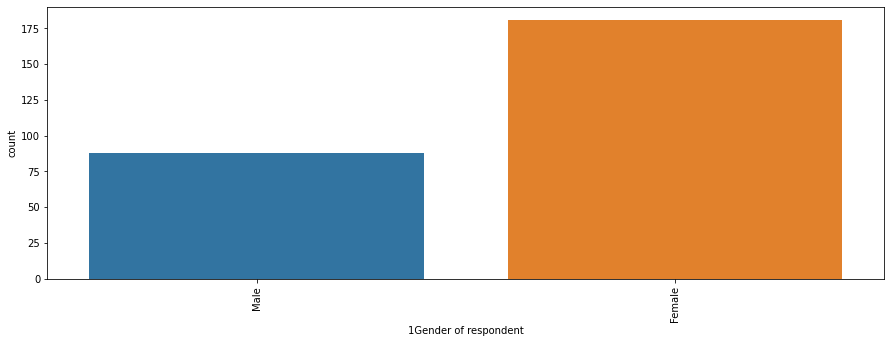

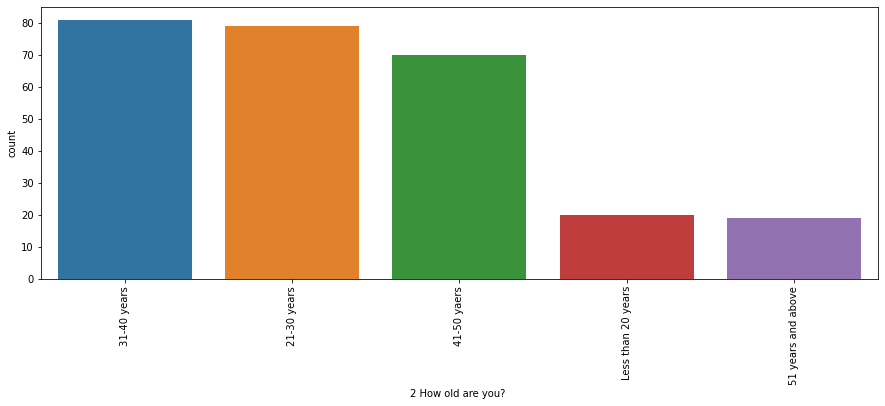

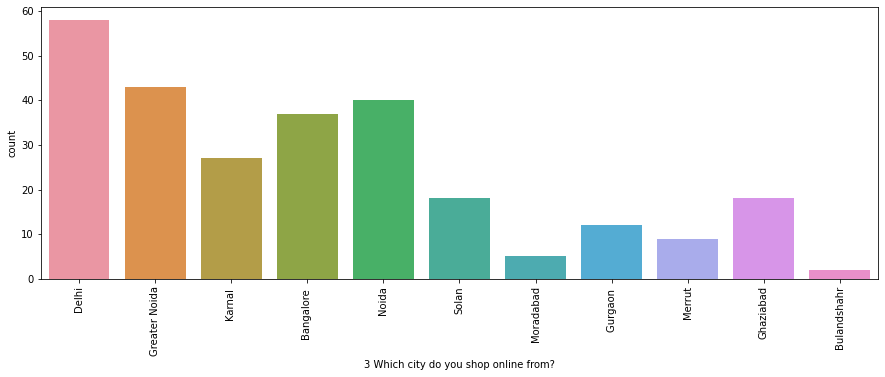

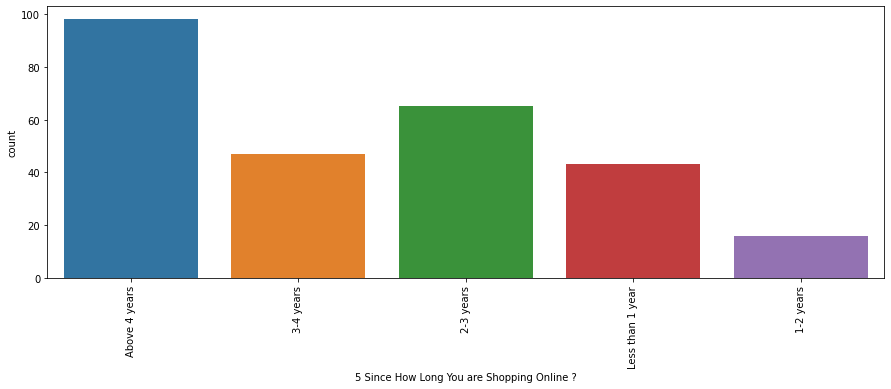

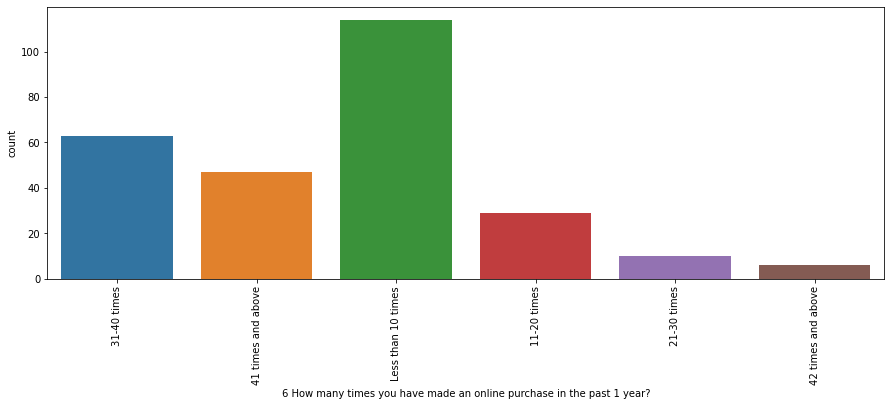

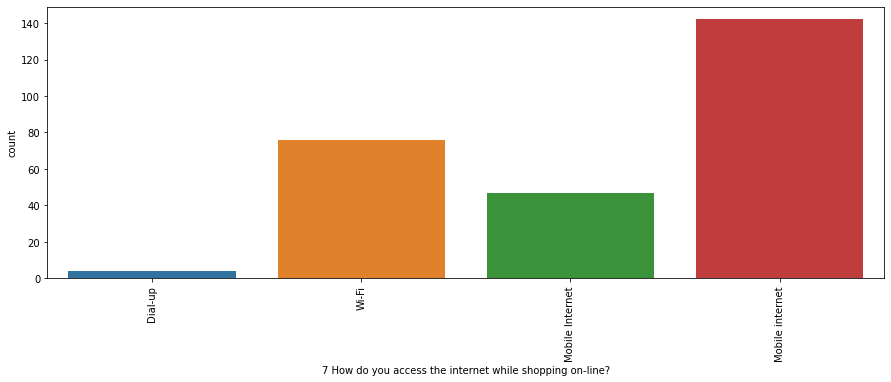

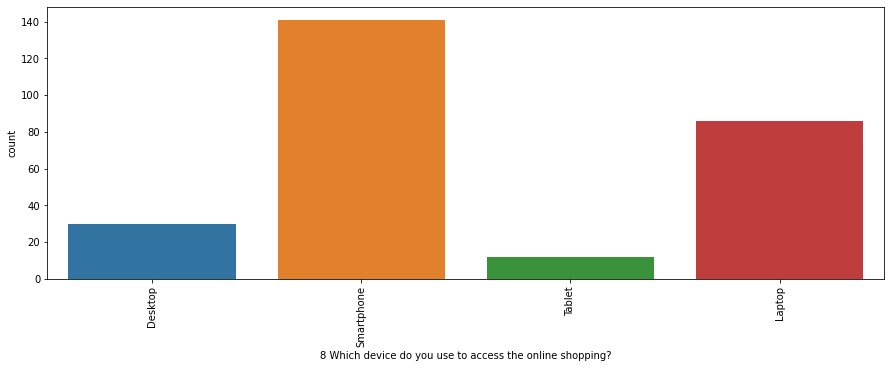

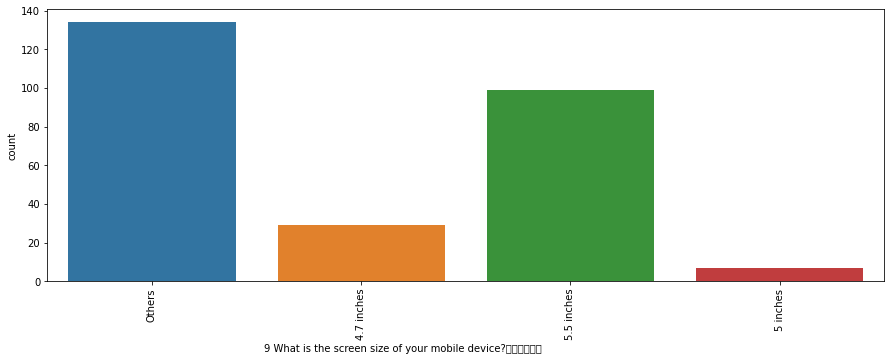

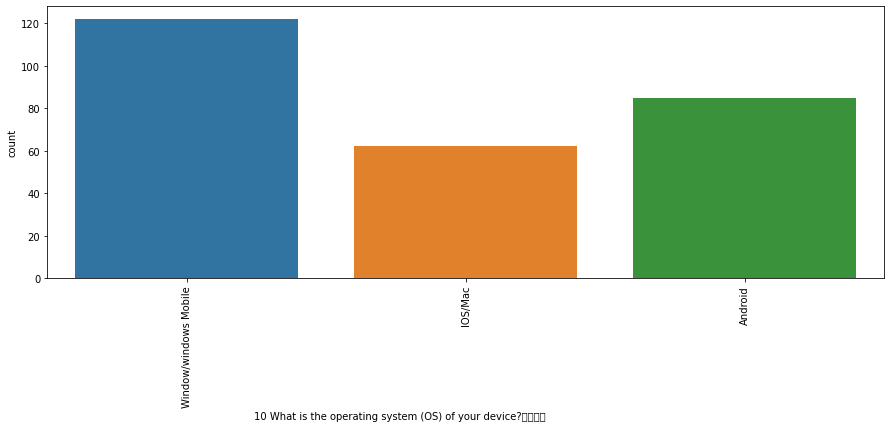

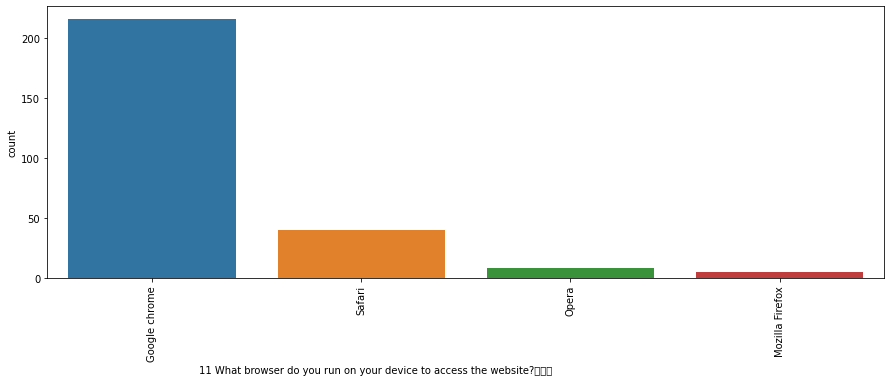

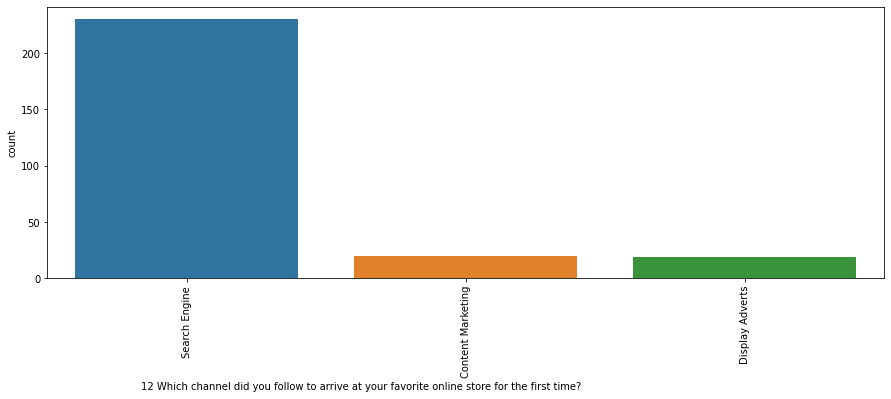

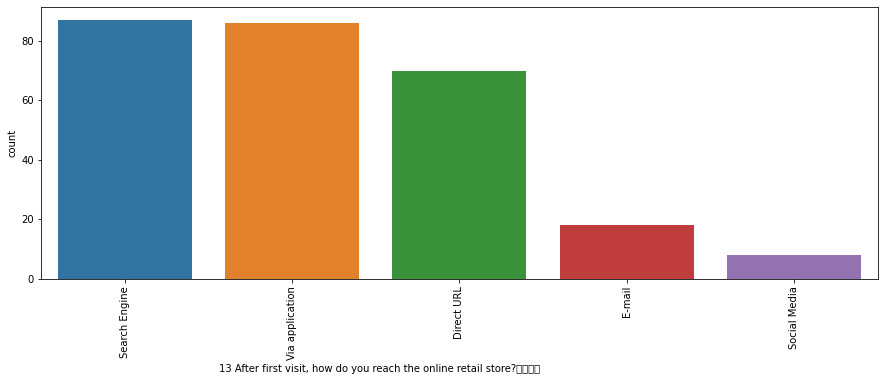

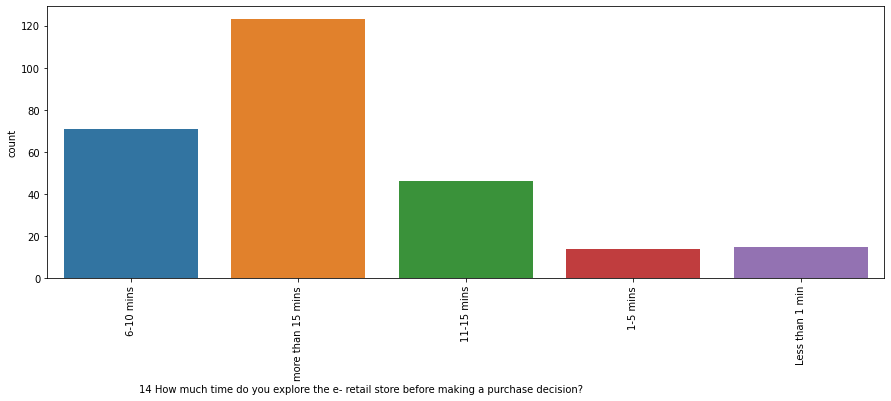

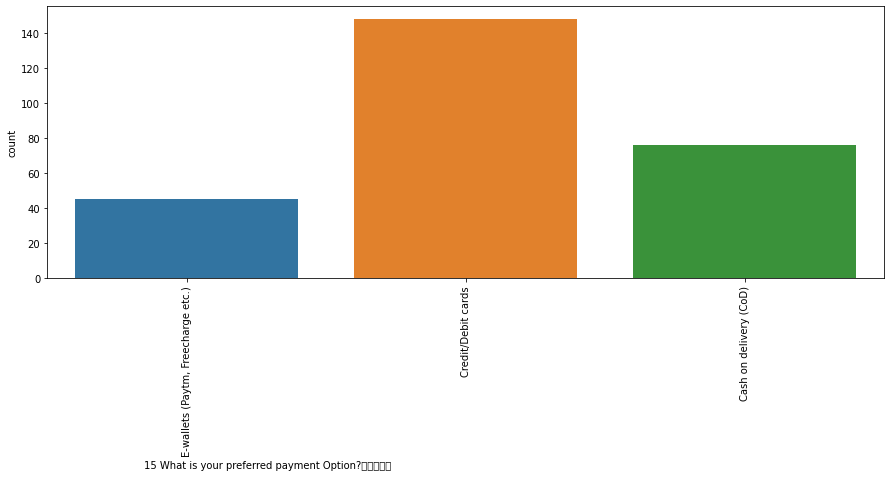

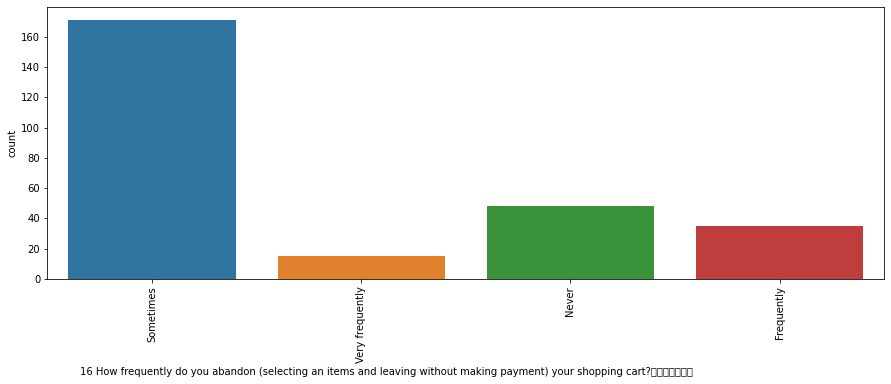

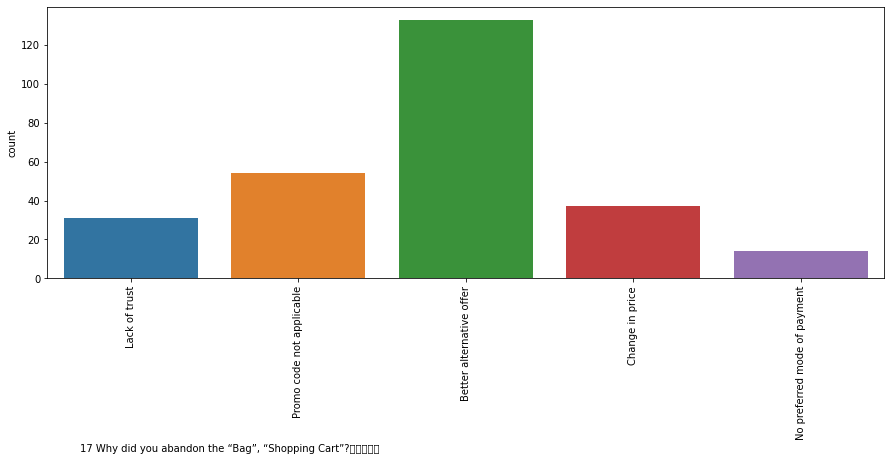

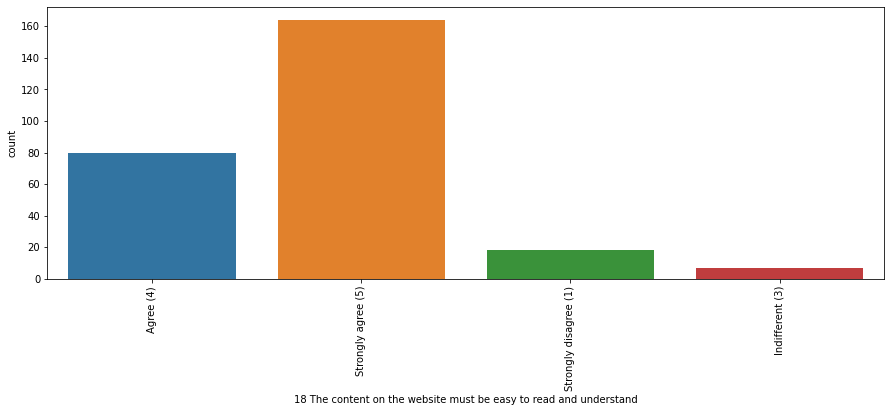

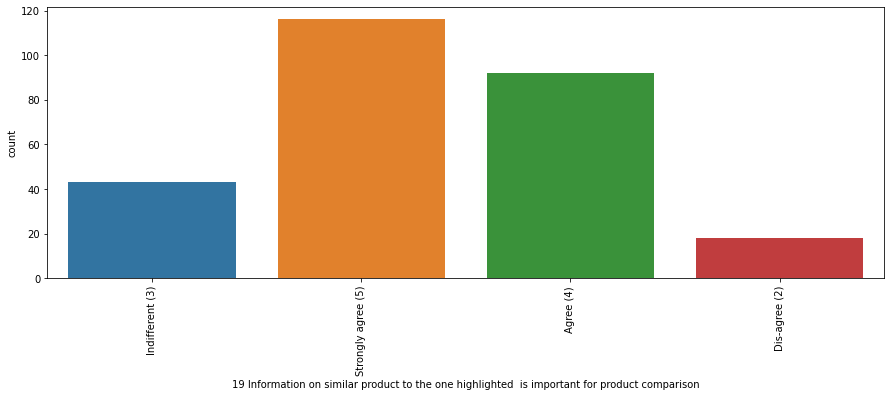

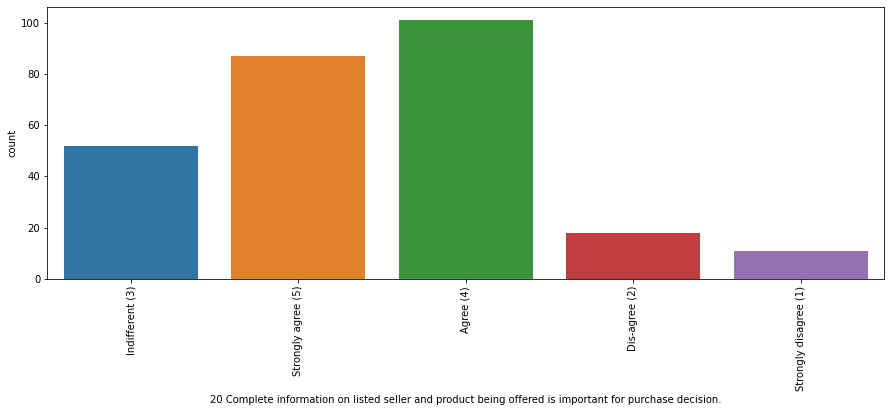

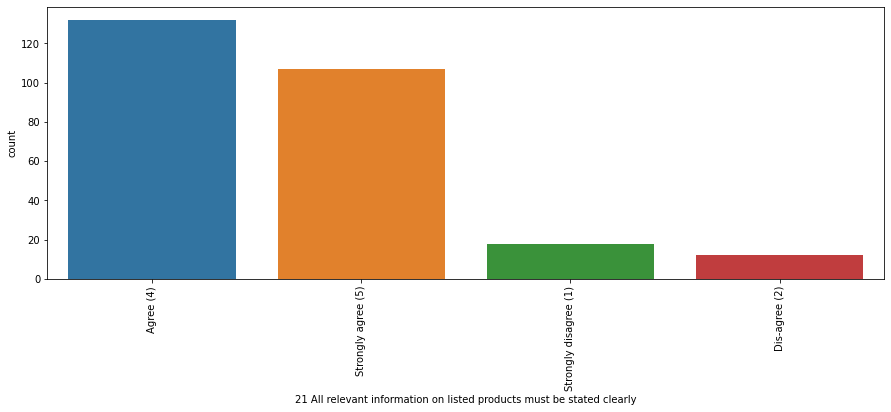

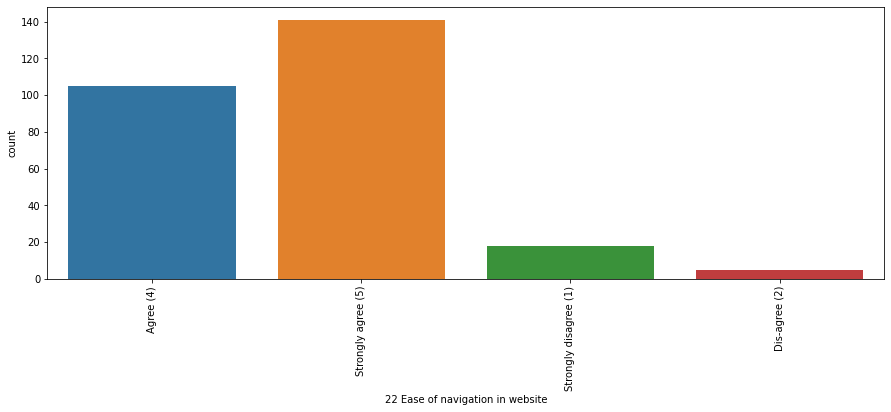

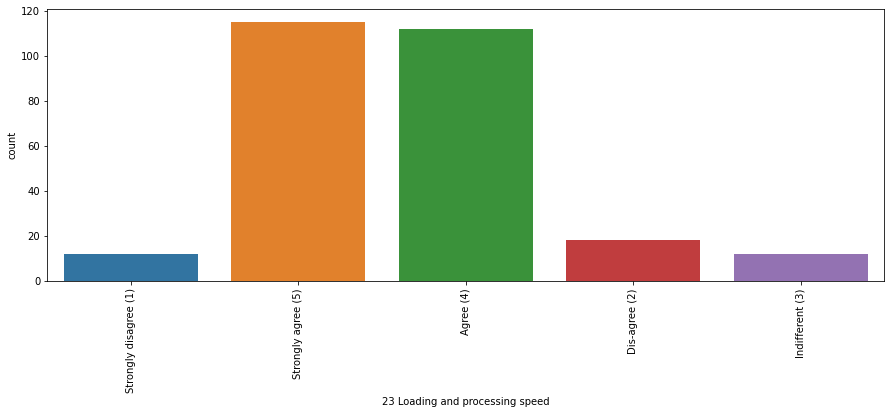

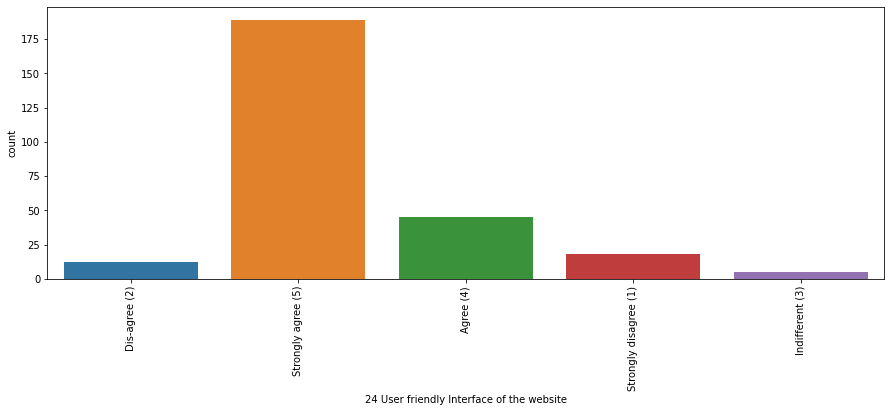

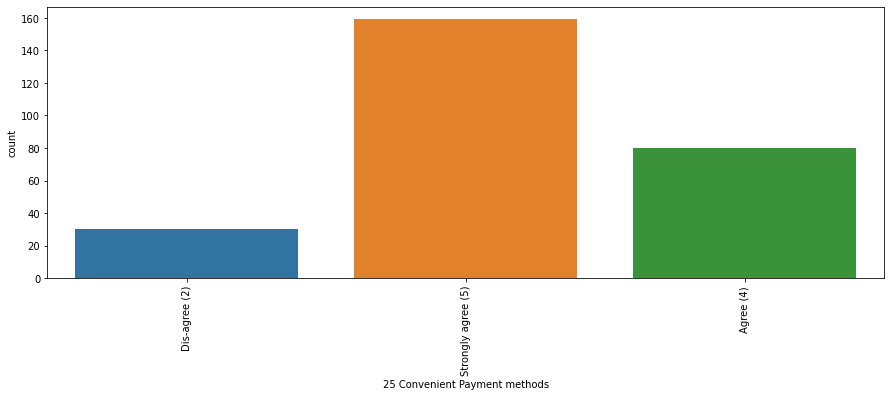

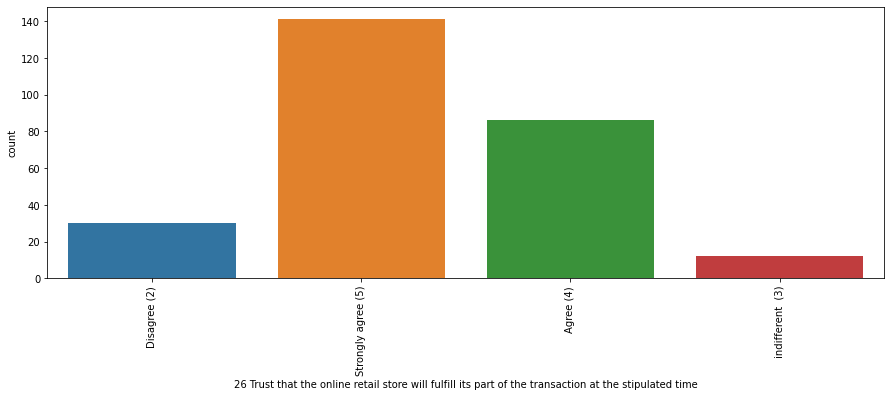

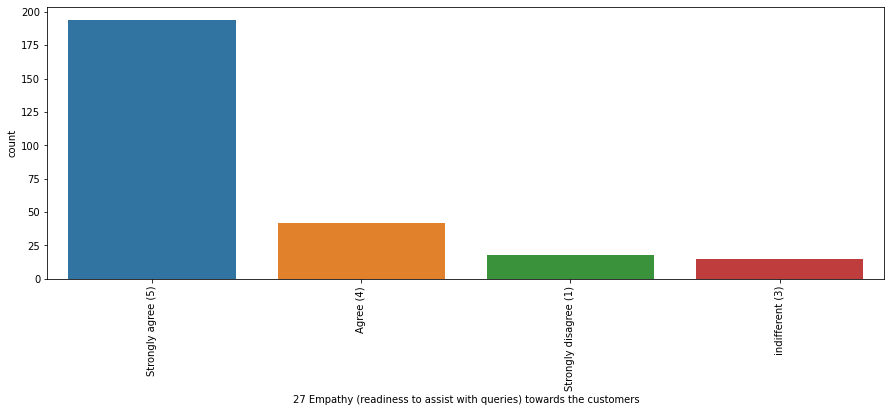

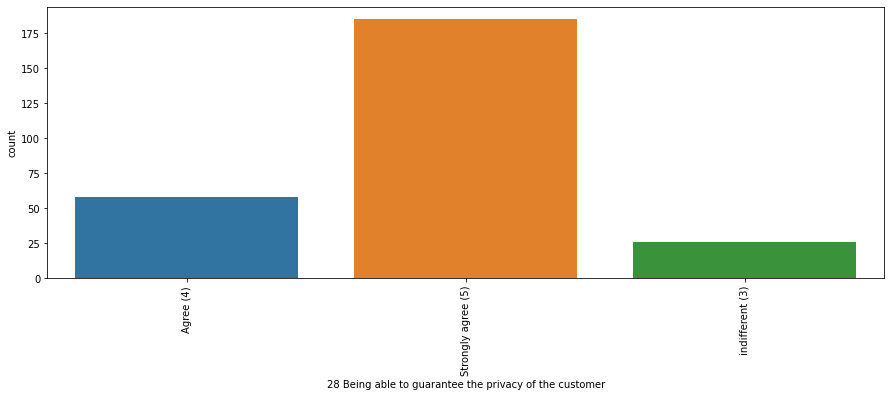

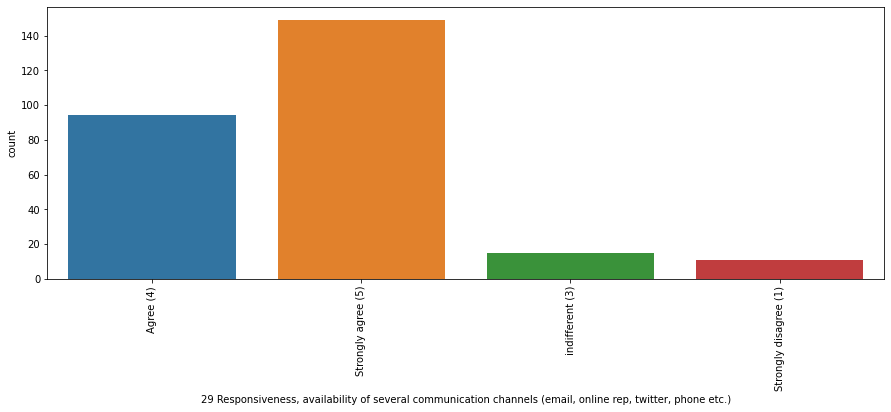

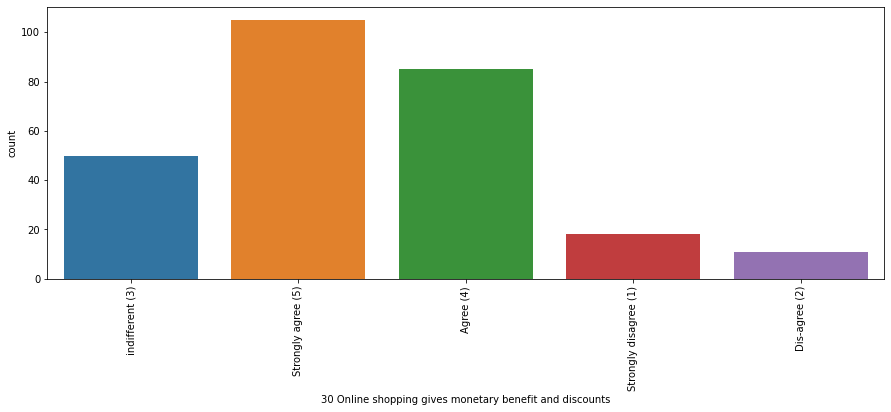

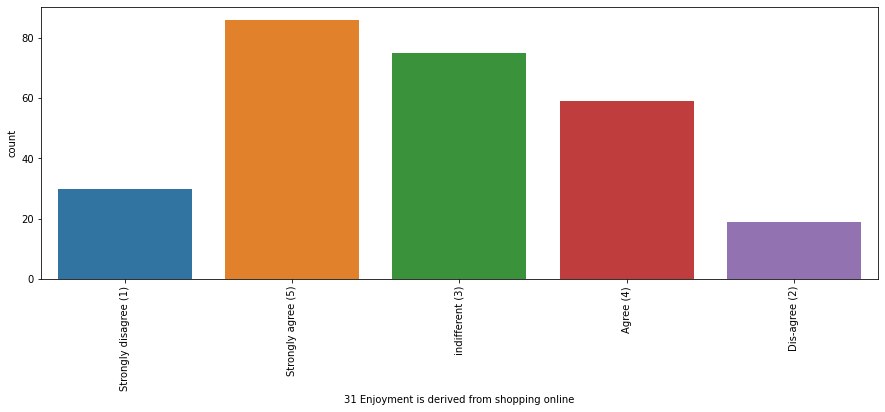

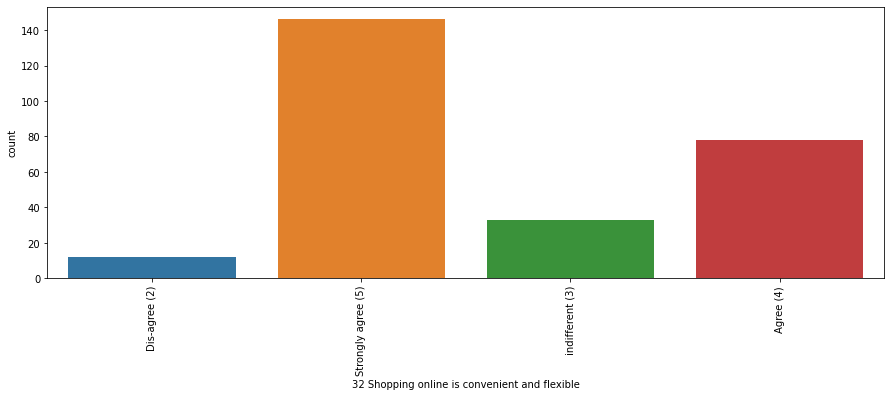

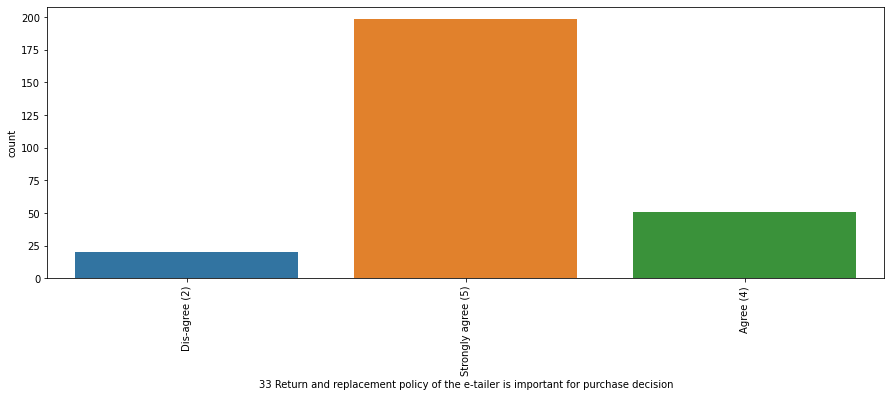

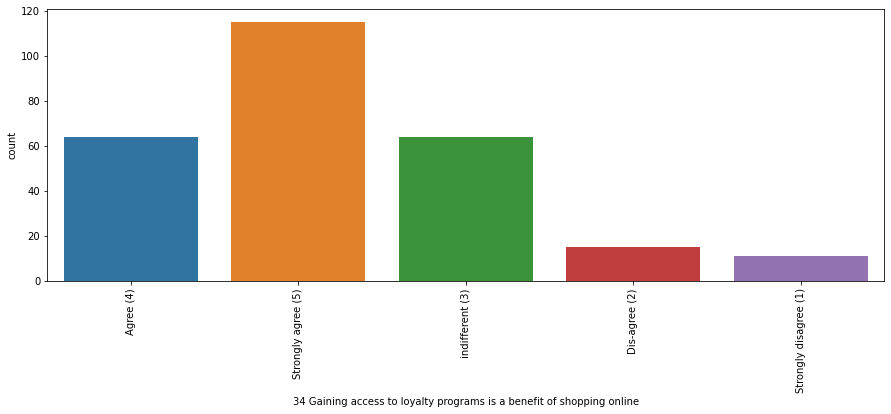

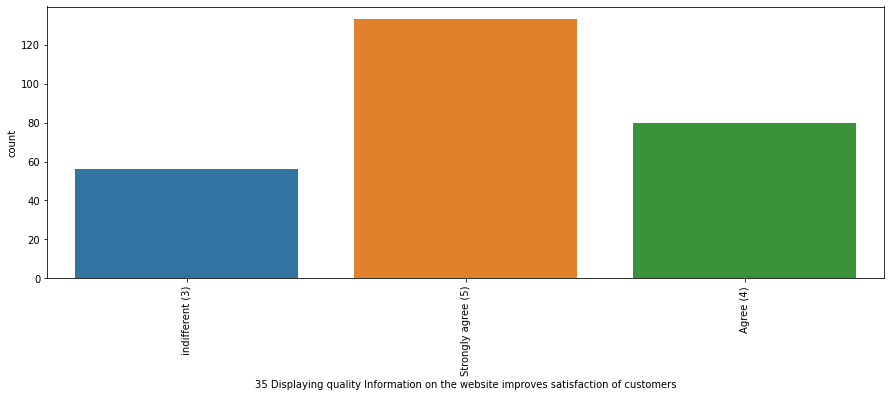

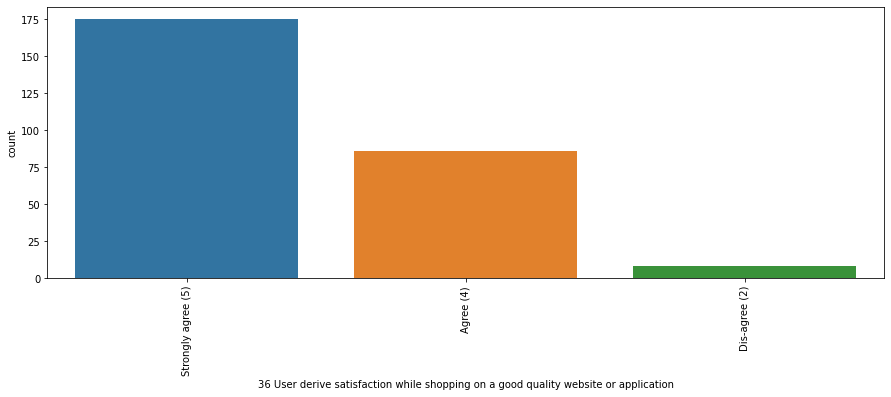

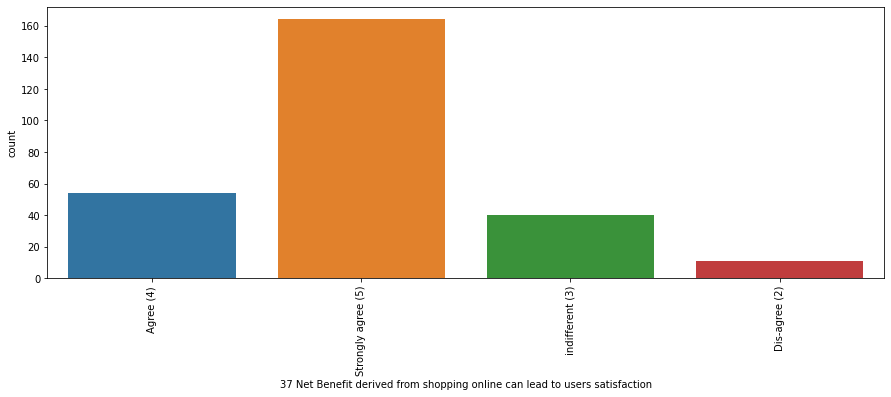

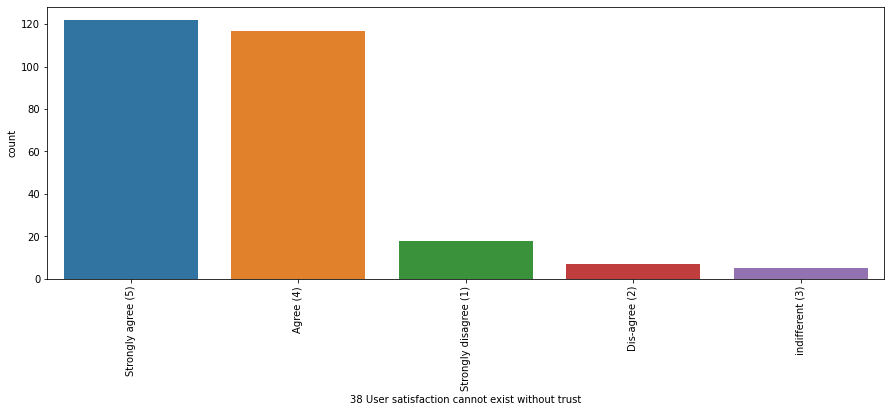

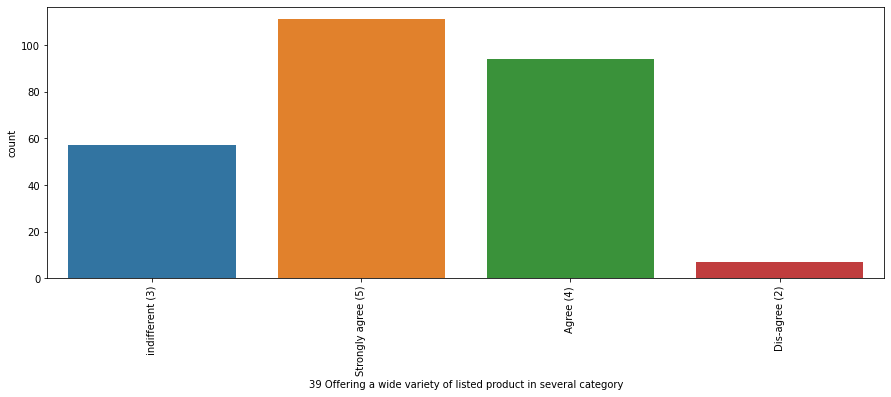

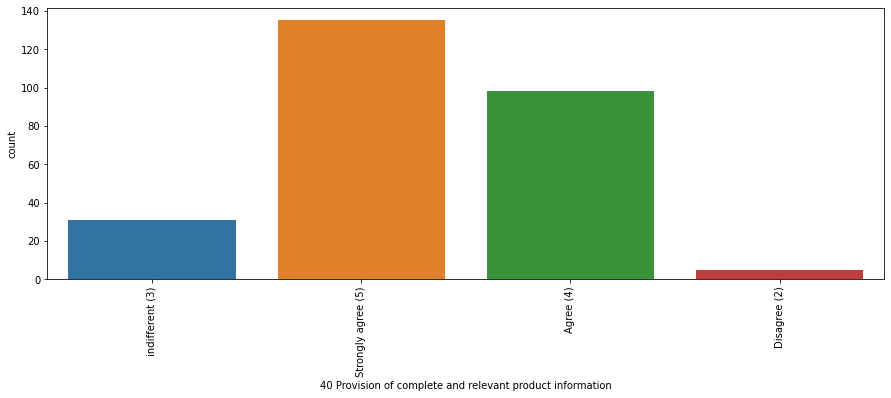

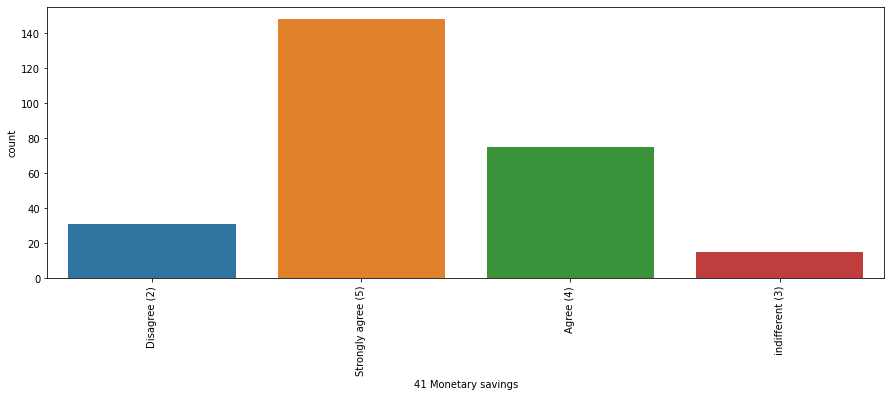

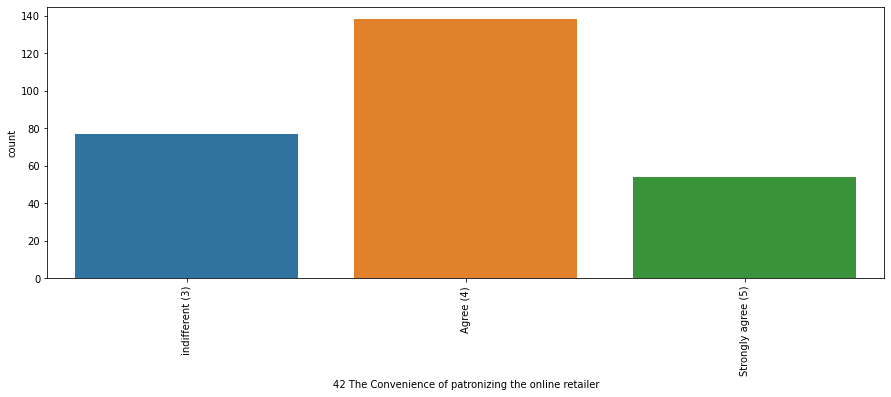

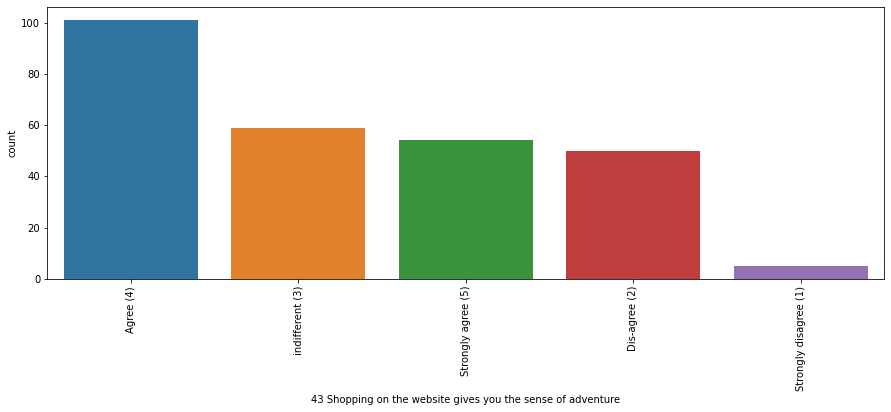

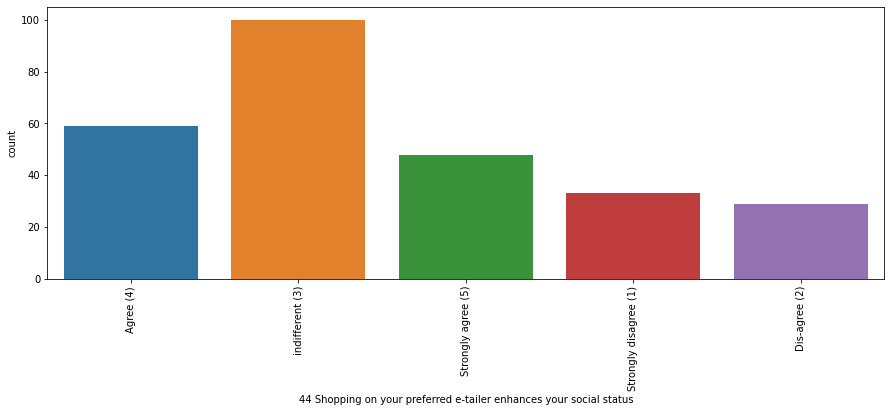

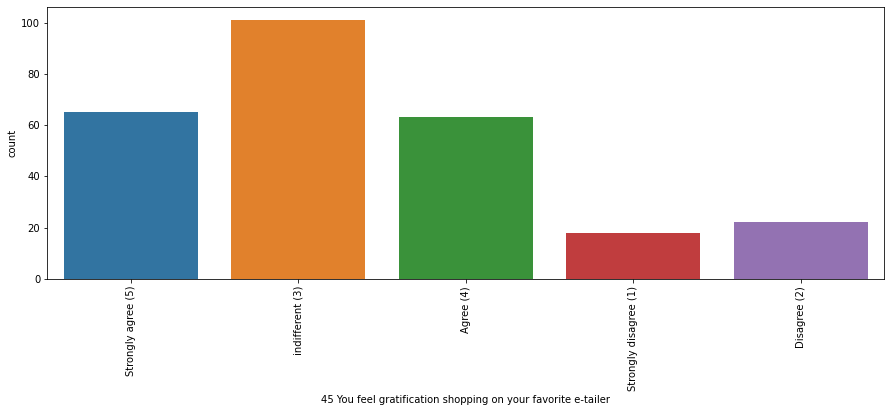

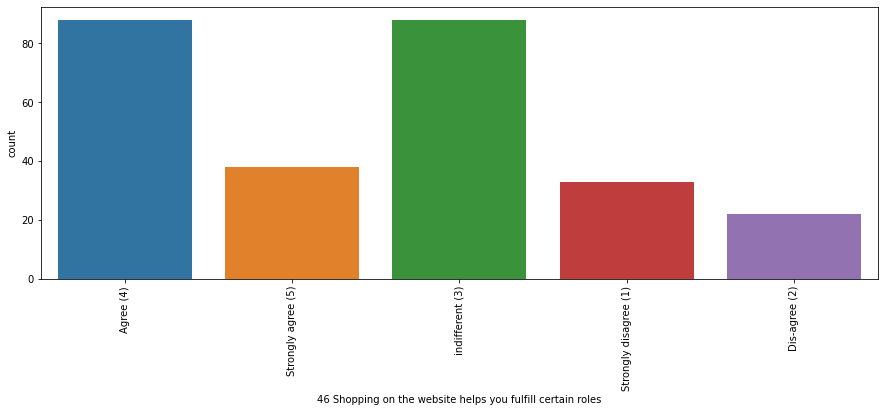

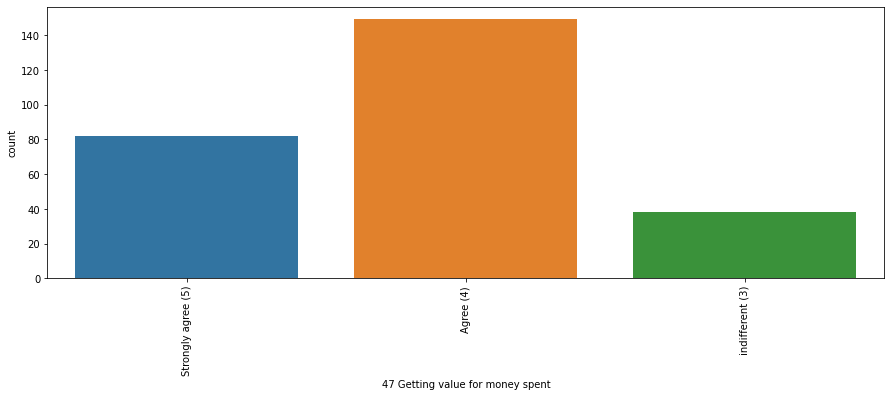

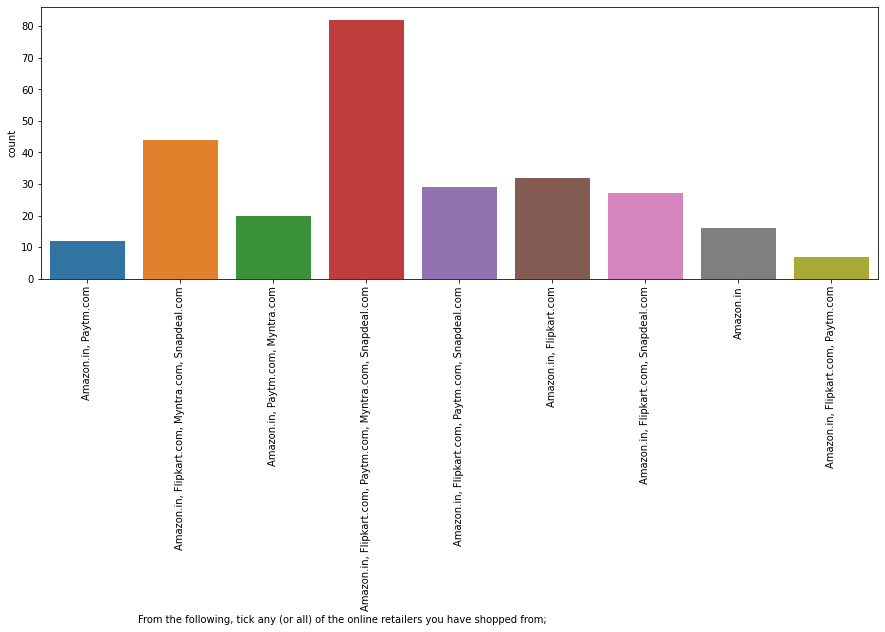

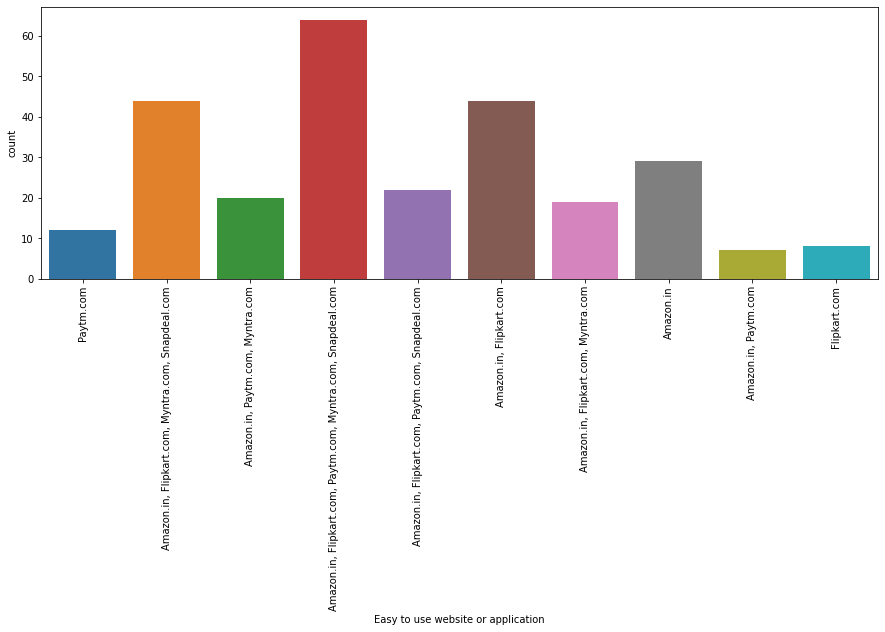

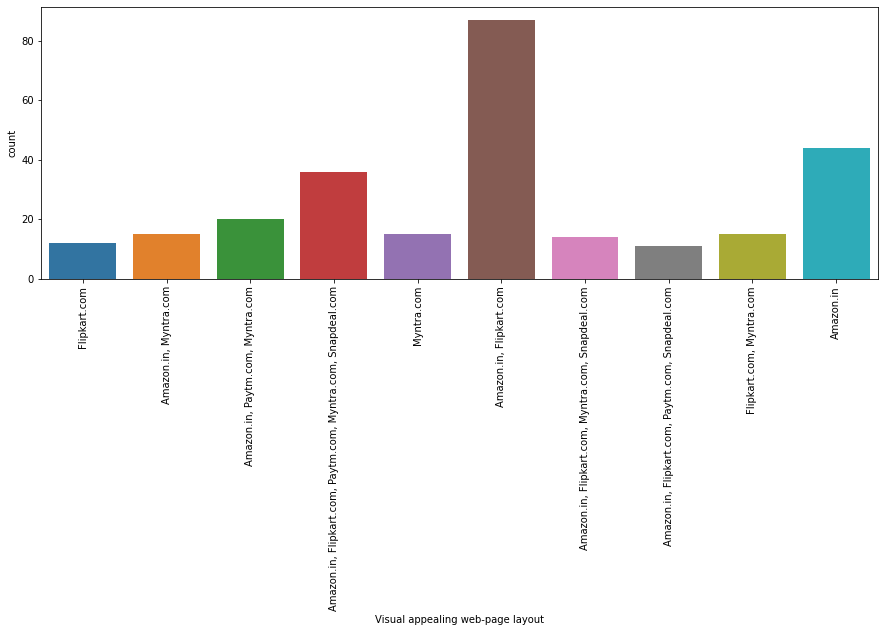

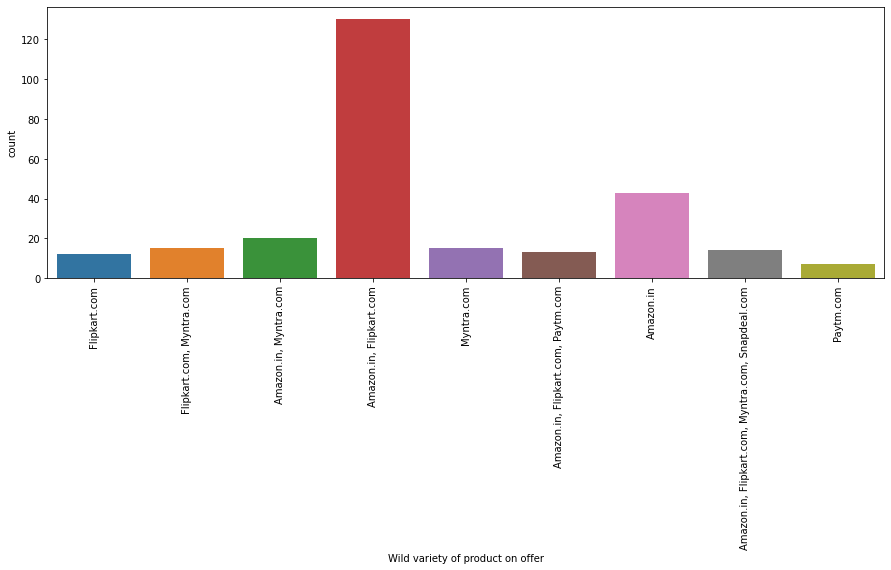

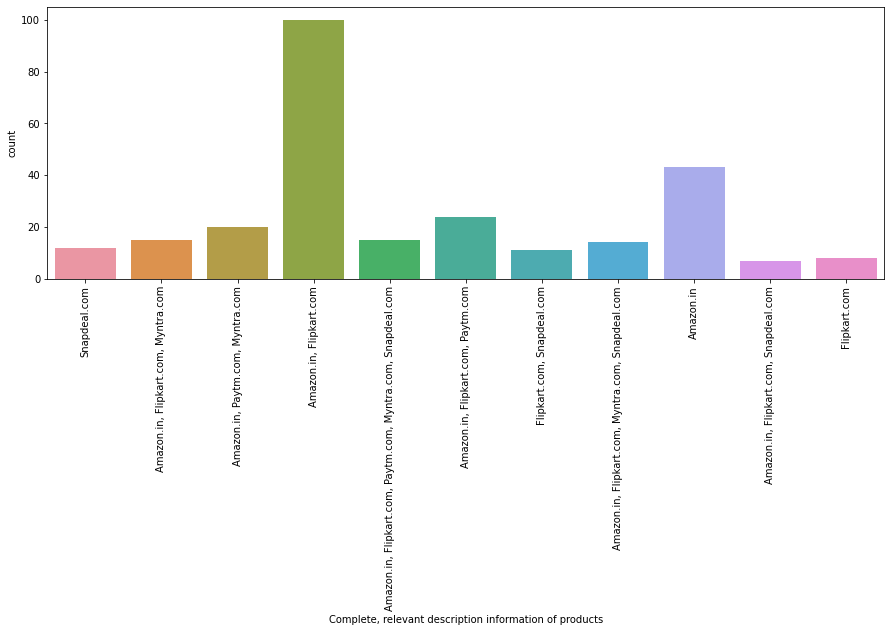

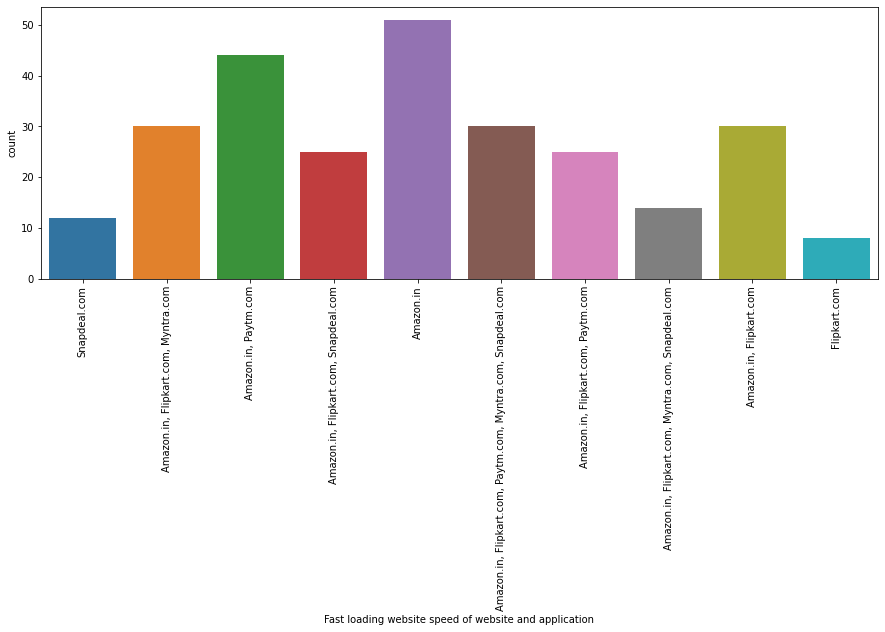

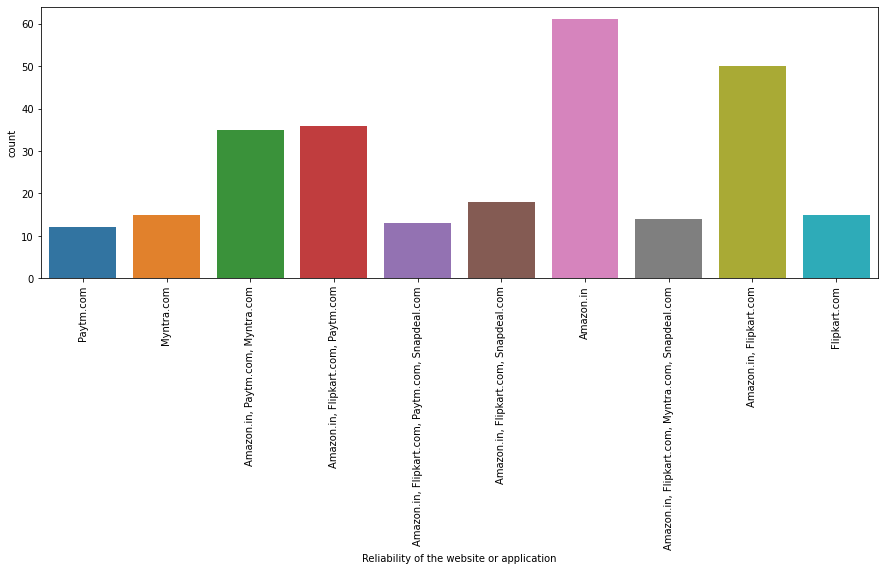

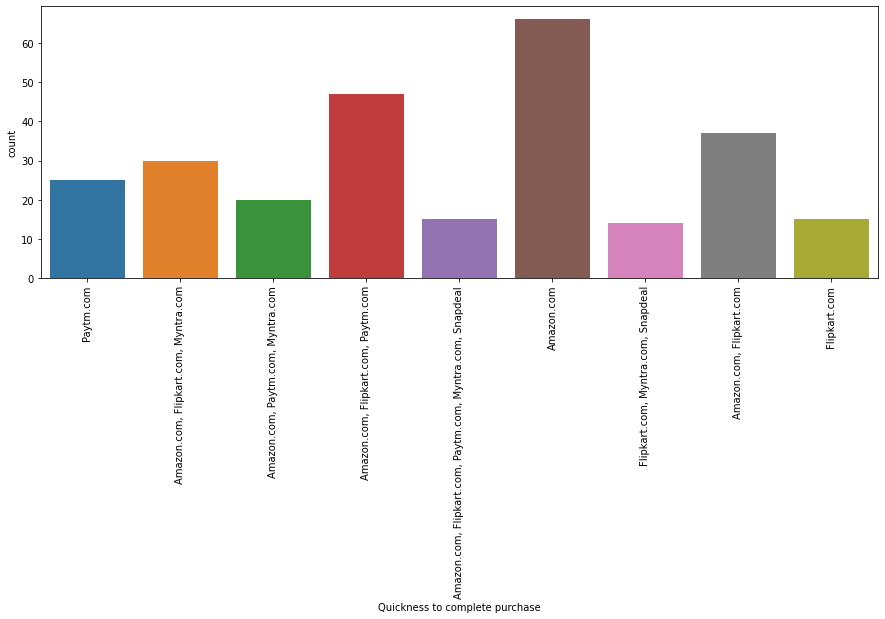

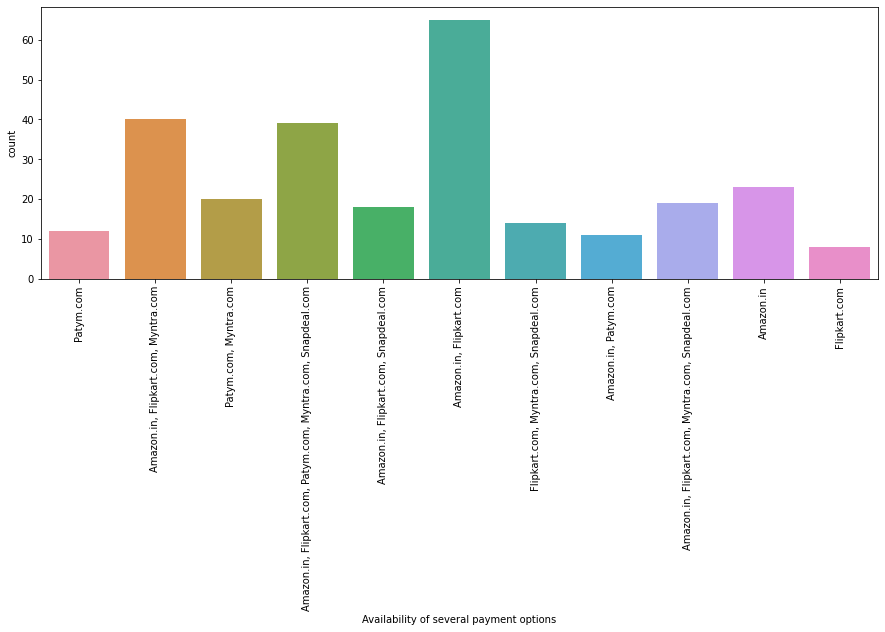

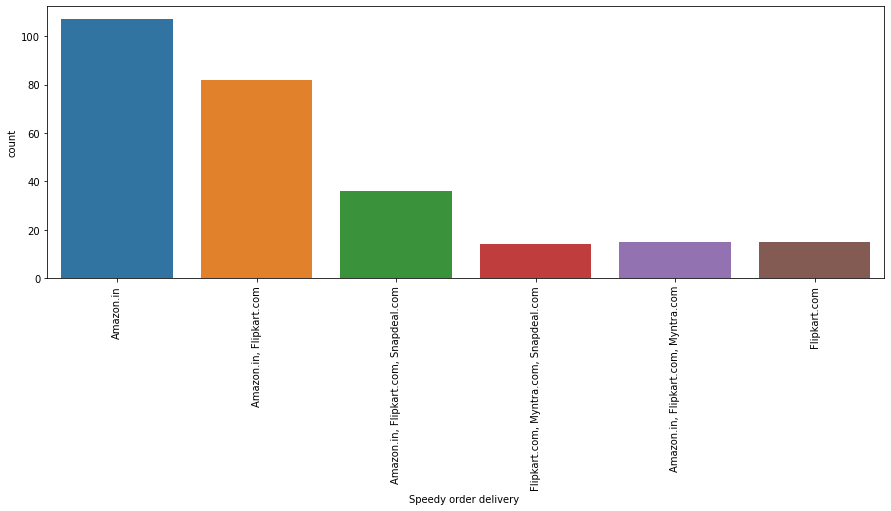

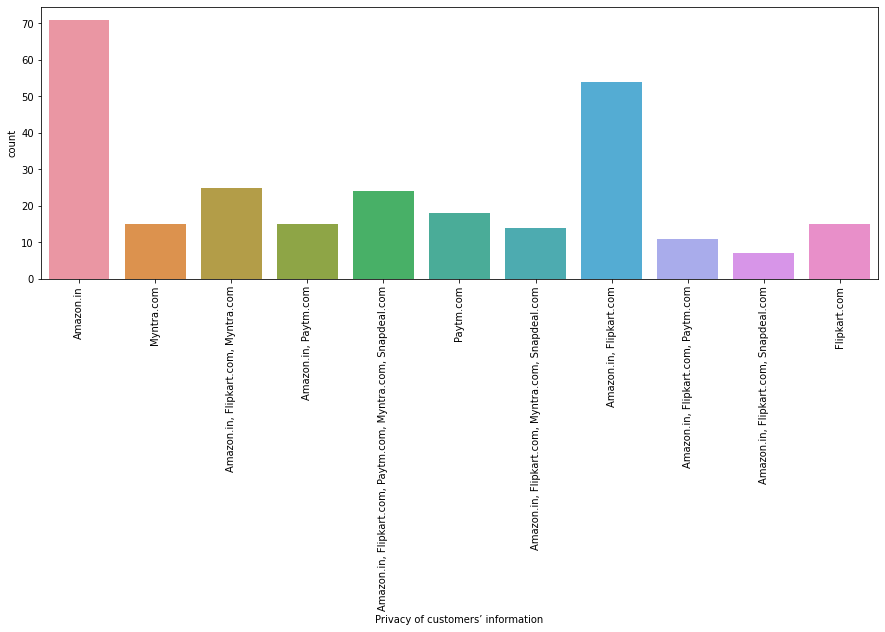

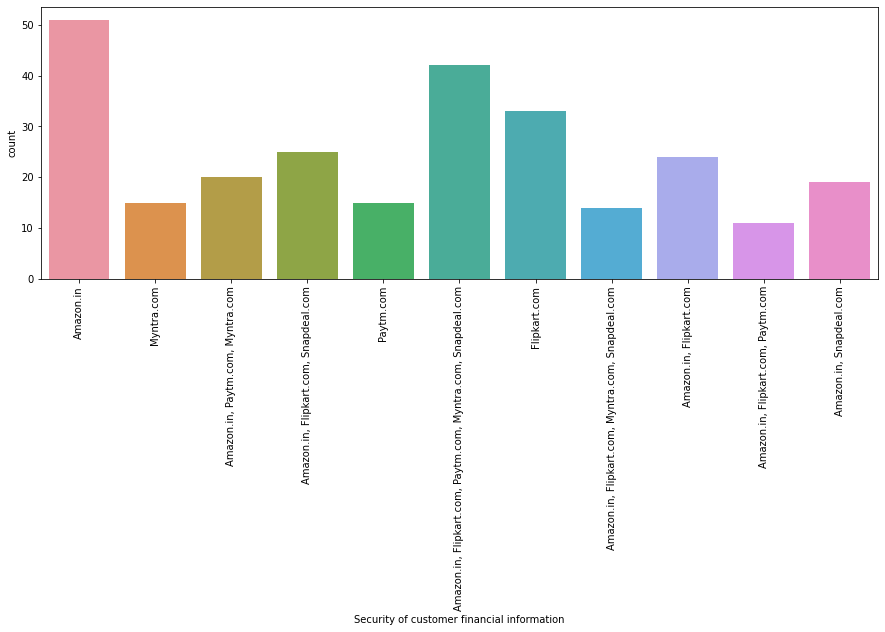

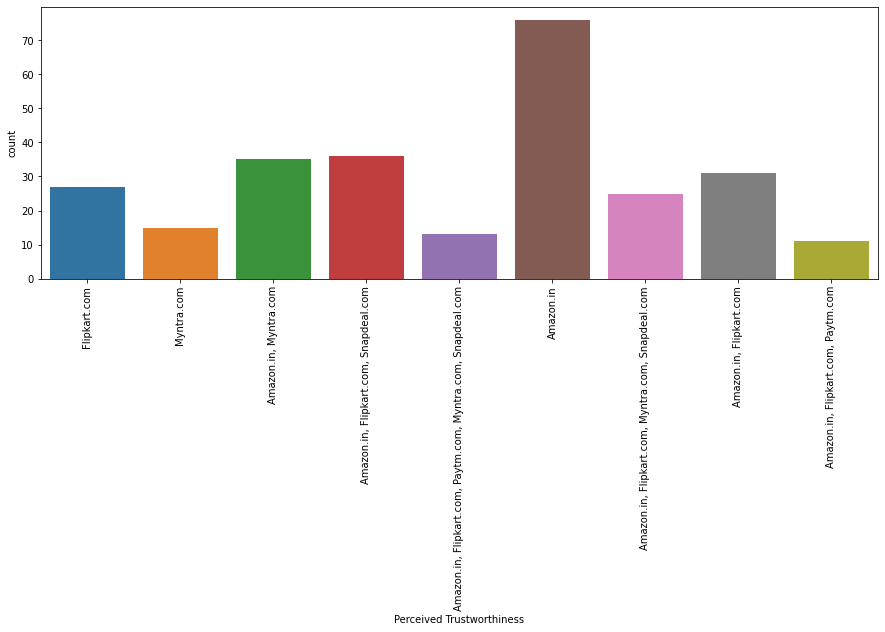

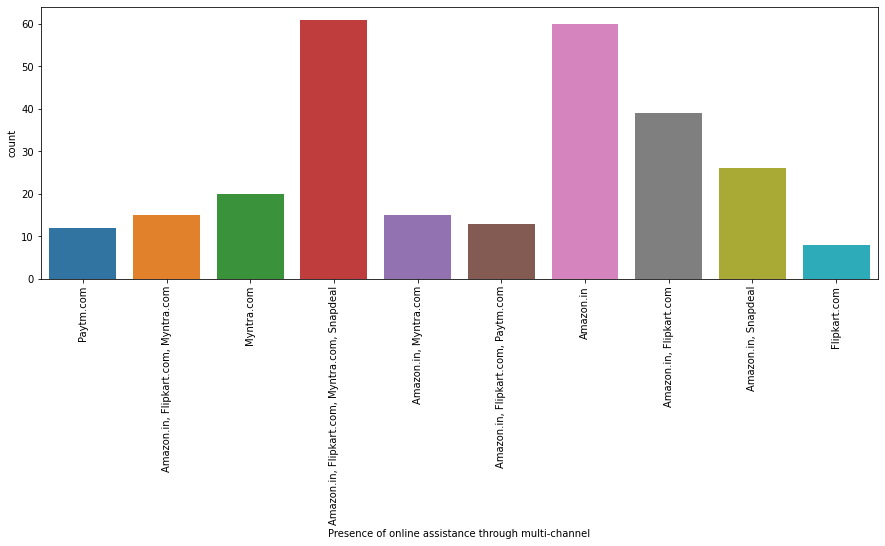

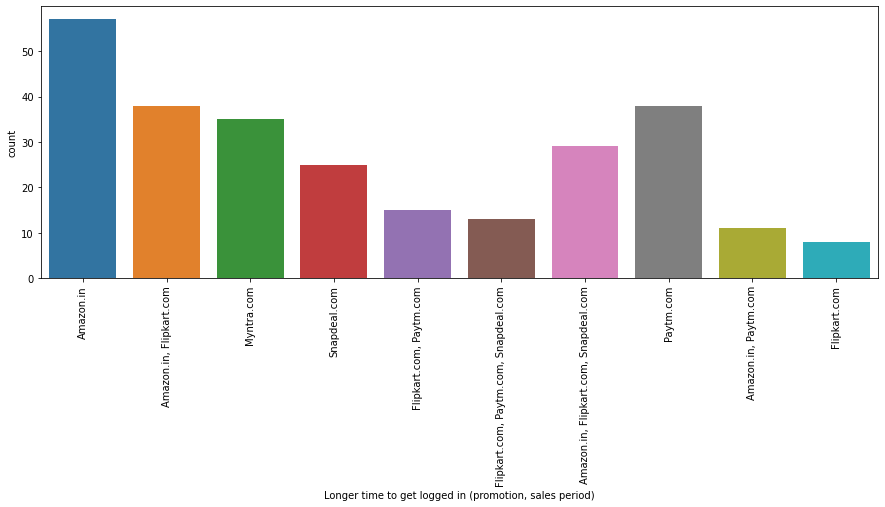

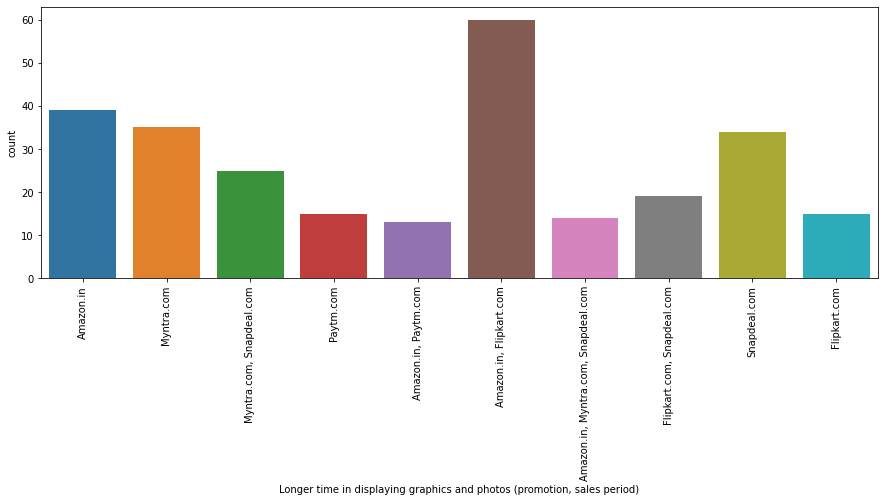

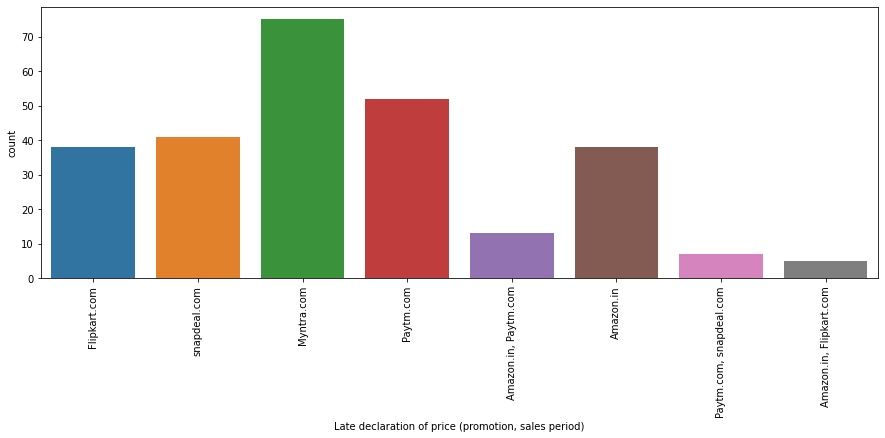

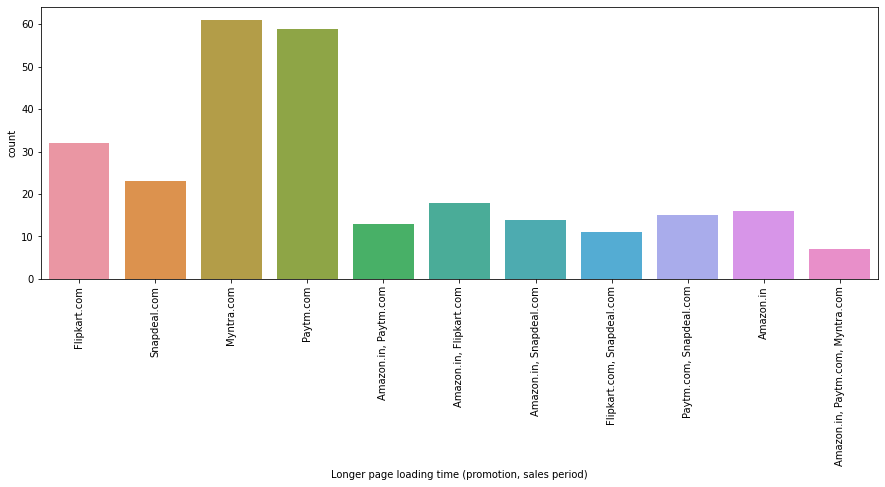

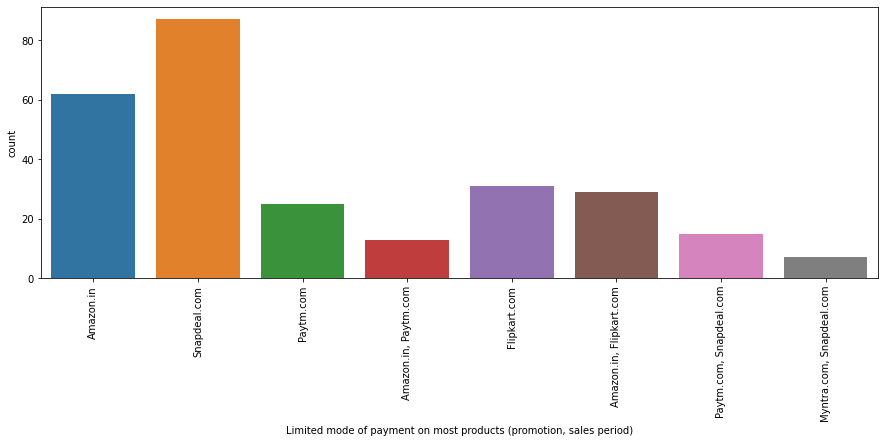

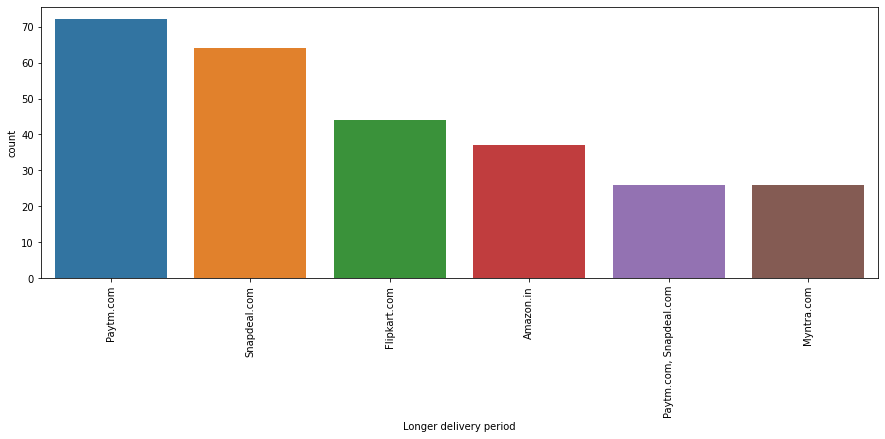

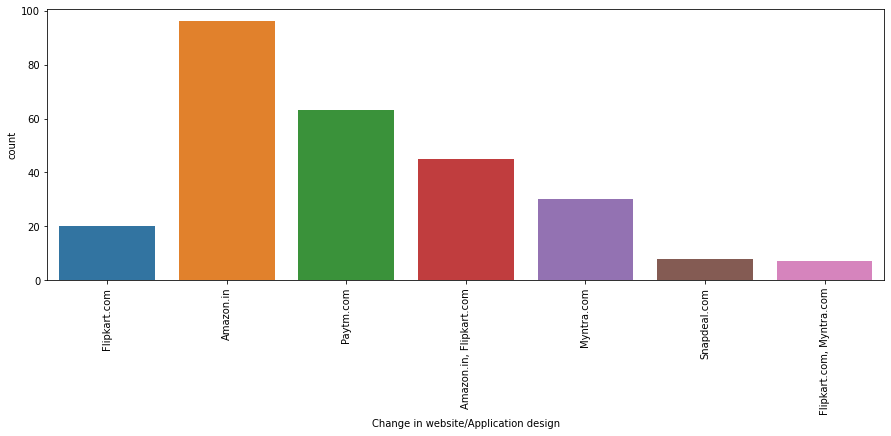

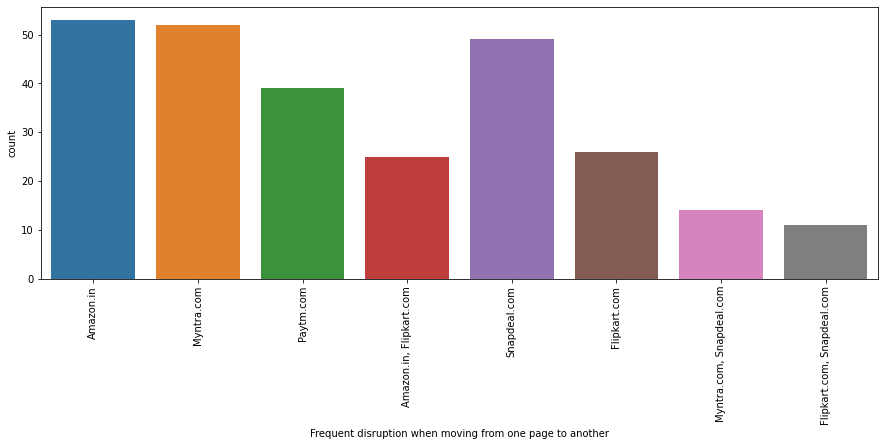

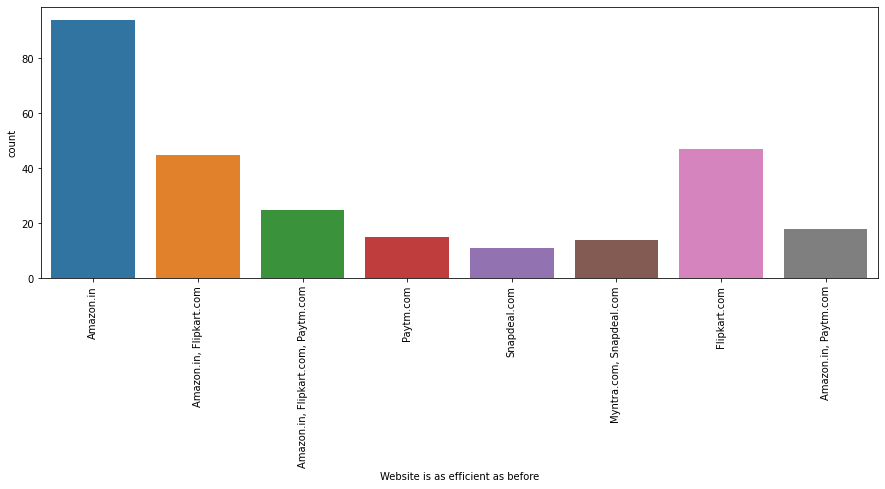

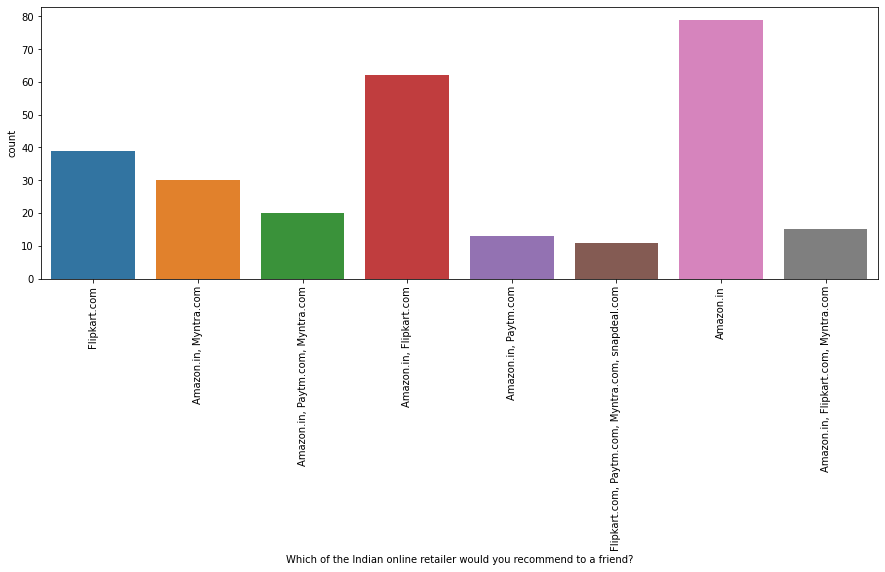

In [17]:
for i in df_obj:
    f=plt.figure(figsize=(15,5))
    f.add_subplot(1,1,1)
    sns.countplot(df[i])
    plt.xticks(rotation=90)

Observation

1. 30 to 40 item purchase online in the dataset is also more means generally maximum person go for online product.
2. Using moblile phone internet for shopping online prodcut is more and Dial Up is very less.
3. Smart Phone and Laptip is maxium time using for online shopping.
4. Windows operating system based mobile and laptop is used for online shop.
5. Google Chrome broser is maximum time to access the website as compare to other browser.
6. Female is more than male in Dataset.
7. Age between 21 to 50 is more buy online product or sserching buying online product.
8. Delhi on metropolition city for online shop is maximum but in Gurgaon online shop is less than Ghaziabad.
9. More than 4 year for Shopping online is maximum in the dataset.
10. Online puchase is less than 10 product is maximum means in the offer day and reqirement of the product than buy the product.
11. After first visit E-mail and social media is not better for reach after first time reach online retail store via Application ,Direct url and serach engine.
12. More than 15 min is for puchase decision.
13. For Payment Option customer credit/debit card and case on delivey option preffered.
14. If Customer make mindset for buying product so generlly payment the pdoduct very less chance for go witout payment.
15. If Customer comparison the price of product in different online shop if better alternative offer for same product is find out in diiferent shop than maximum chance to leave witout payment.
16. Content of the website or Product is easy to read and understand for userr for reataion of cutomer chance is increse.
17. For similar product one highlighted is very importent for cutomer to buyig product using comaprison.
18. Before the Purchase the product customer read the compete information about listed seller and product deatil.
    So comlete product deatil and seller informatiom is very useful factor in online shop.
19. Navigation of the website is also good for online shop or retaion of the customer.
20. Loading and processing spped is very less than customer leave the website and not chanse to again come for shop.
21. for purchase the decion of any product return and replacement policy is very importent for online shop if return and replacement policy is avalable than customer purchase the product.
22. Quality information is provided for satisfaction for customer.  
23. If user satisfy with the application or website of online shop than again come and reach buyiing the product.
24. If user is not trust the online shop than user staisfaction is not importenet so firstly the trust factor builldup by online shop.
35. Wide range of product category for user than maximum chanse to buying the product is satisfy and trust on yhe online shop.So category of the product is more so maximum cganse to user not leave.
26. User friendly website is also importent factor for reation of customer.
27. Payemt option is aslo convienet.
28. Privecy of the customer is gurantee by customer is also importent for retaion of the cutomer or online shop.
29. If different communication channel is provided by Online shop than maximum chance to reation of the customer.
30. Online shop provide benifit and discount in the product than customer again reach for buying the product from online shop.

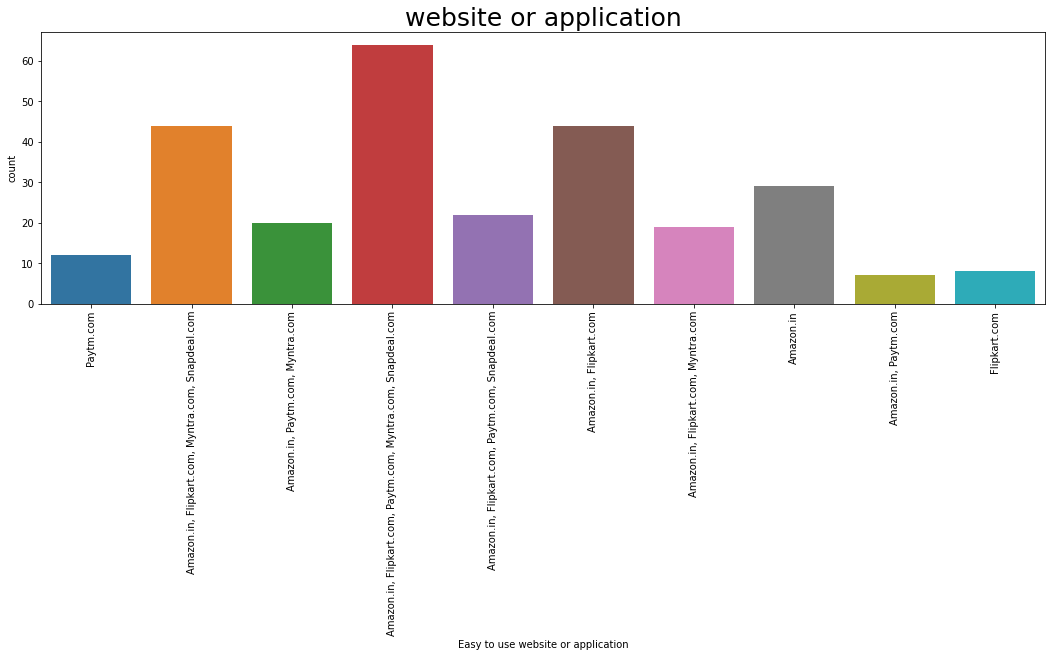

In [19]:
plt.figure(figsize=(18,5))
plt.xticks(rotation=90)
sns.countplot(x='Easy to use website or application', data=df)

plt.title('website or application',fontsize=25)
plt.show()

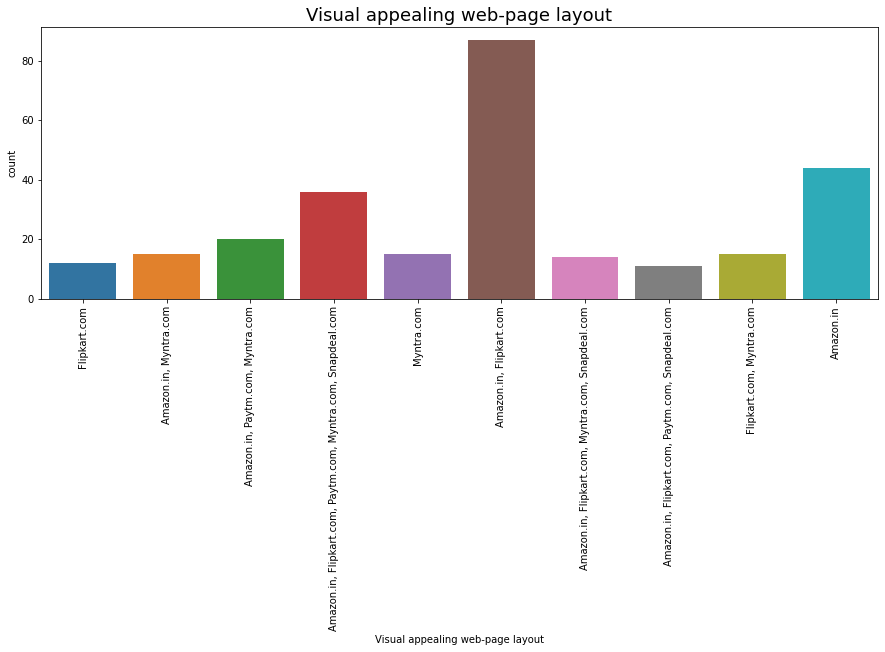

In [20]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x='Visual appealing web-page layout', data=df)

plt.title('Visual appealing web-page layout',fontsize=18)
plt.show()

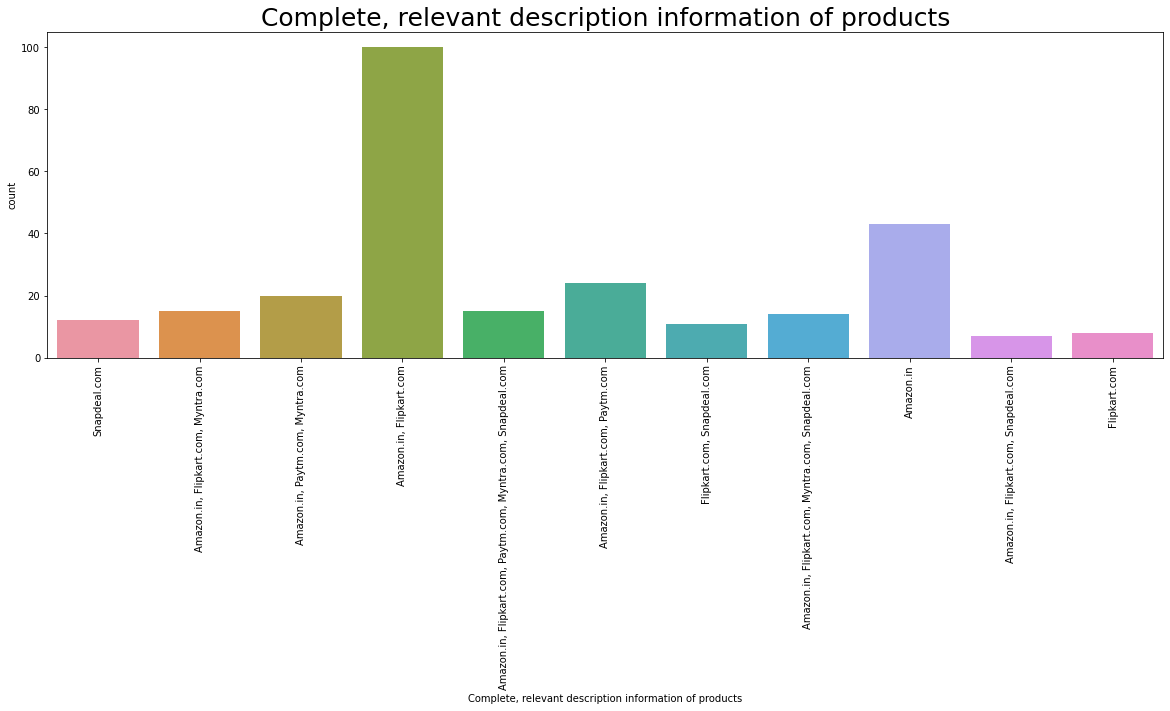

In [21]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Complete, relevant description information of products', data=df)

plt.title('Complete, relevant description information of products',fontsize=25)
plt.show()

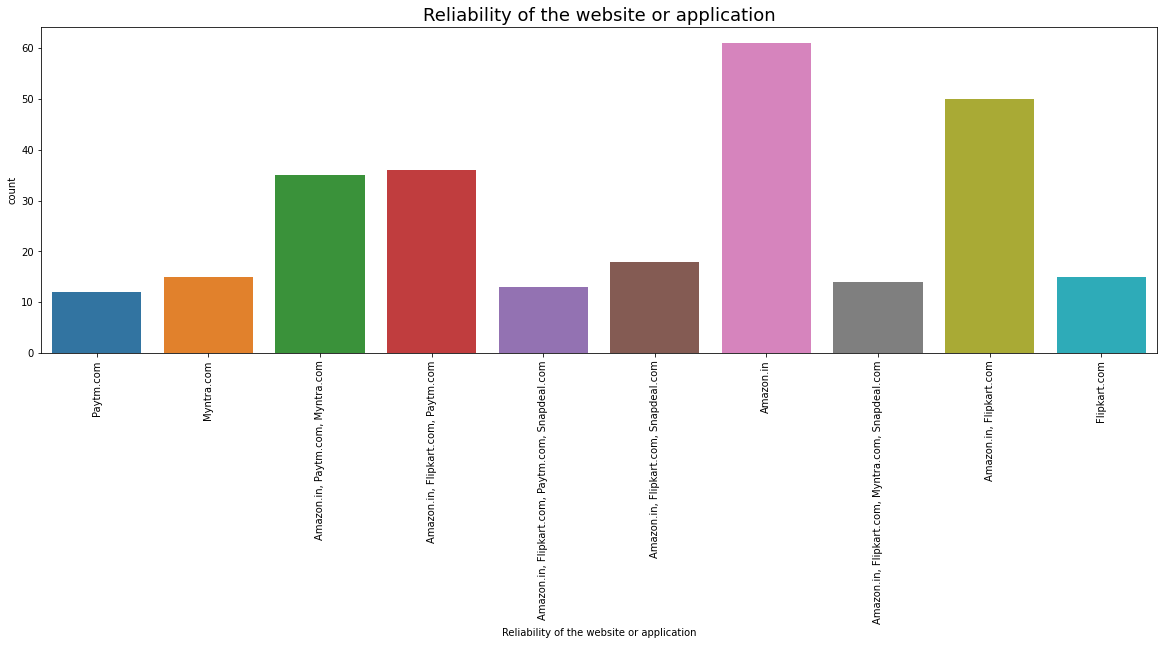

In [23]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Reliability of the website or application', data=df)

plt.title('Reliability of the website or application',fontsize=18)
plt.show()

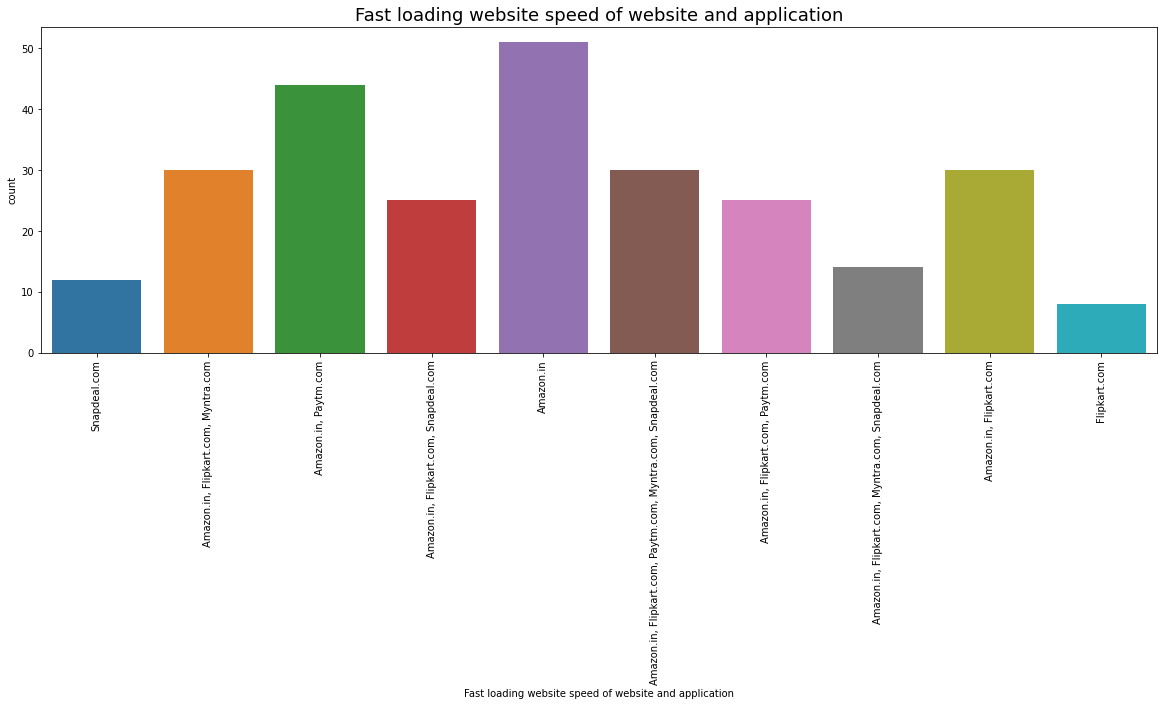

In [22]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Fast loading website speed of website and application', data=df)

plt.title('Fast loading website speed of website and application',fontsize=18)
plt.show()

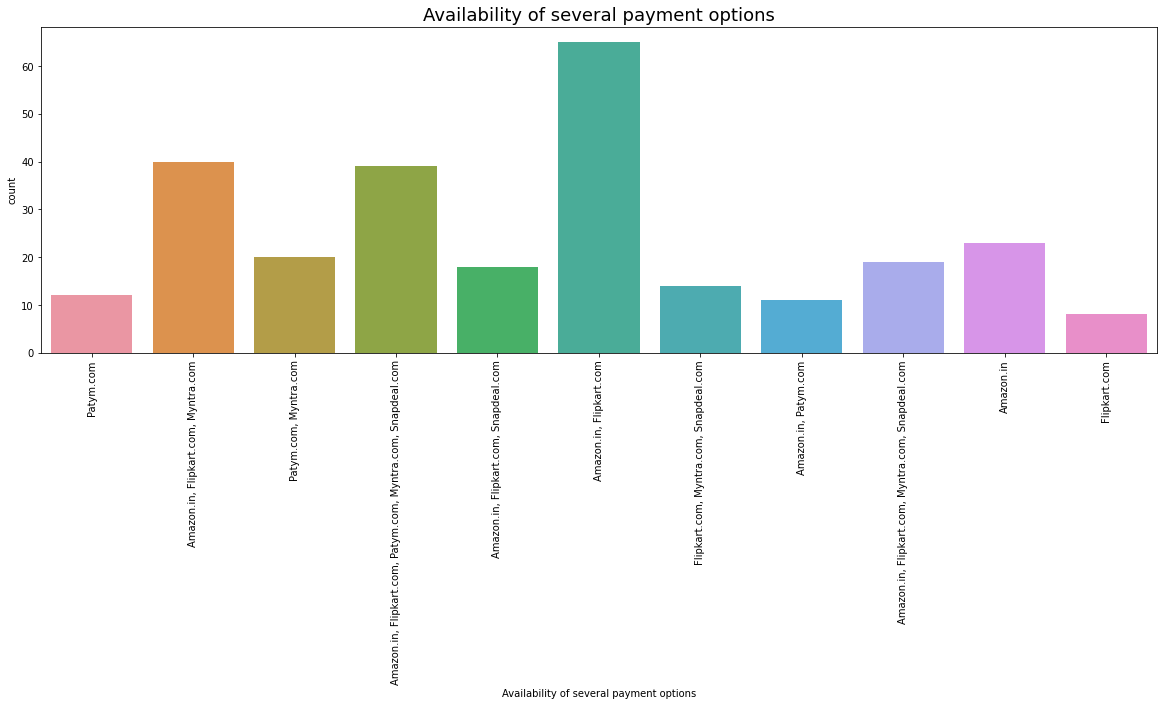

In [24]:

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Availability of several payment options', data=df)

plt.title('Availability of several payment options',fontsize=18)
plt.show()

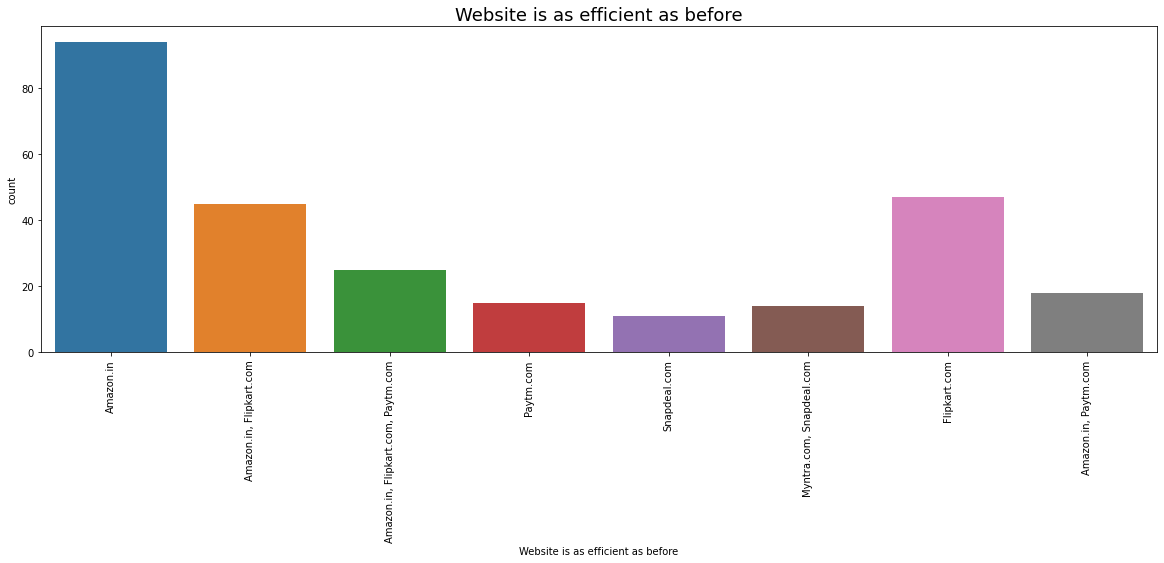

In [25]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Website is as efficient as before', data=df)

plt.title('Website is as efficient as before',fontsize=18)
plt.show()

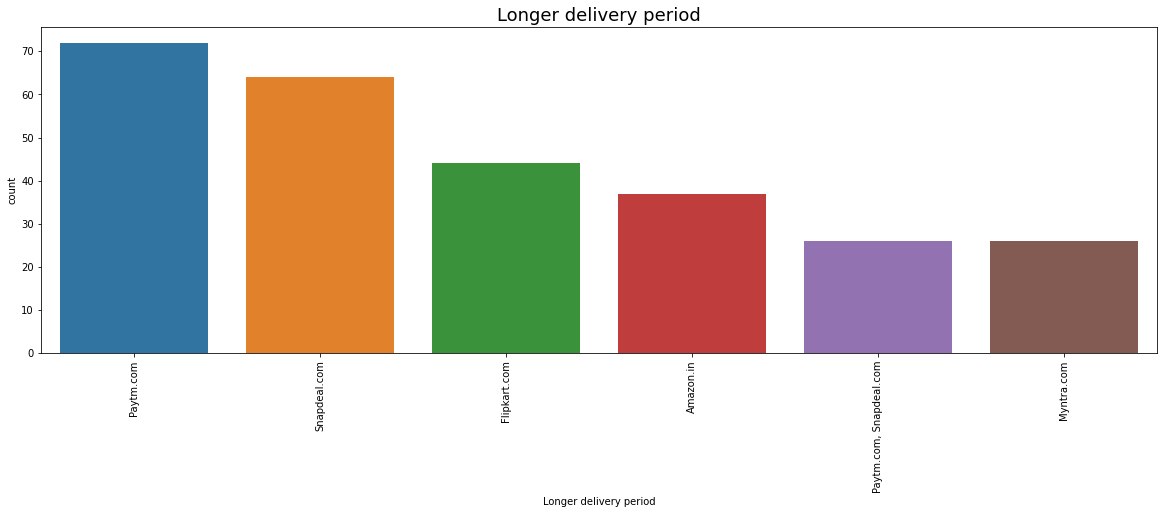

In [26]:
plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Longer delivery period', data=df)

plt.title('Longer delivery period',fontsize=18)
plt.show()

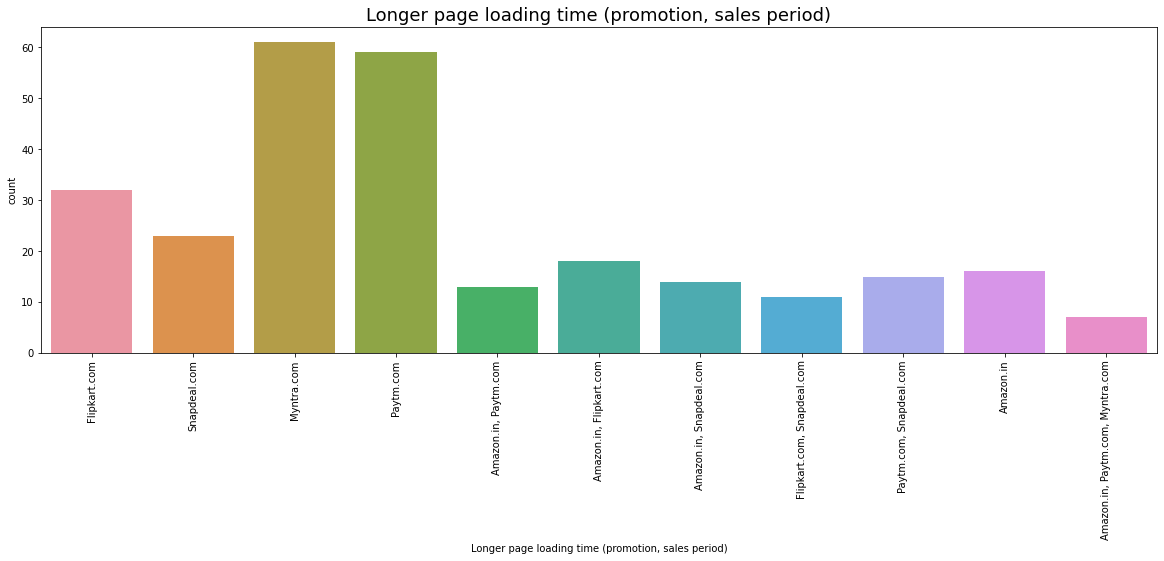

In [27]:

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Longer page loading time (promotion, sales period)', data=df)

plt.title('Longer page loading time (promotion, sales period)',fontsize=18)
plt.show()

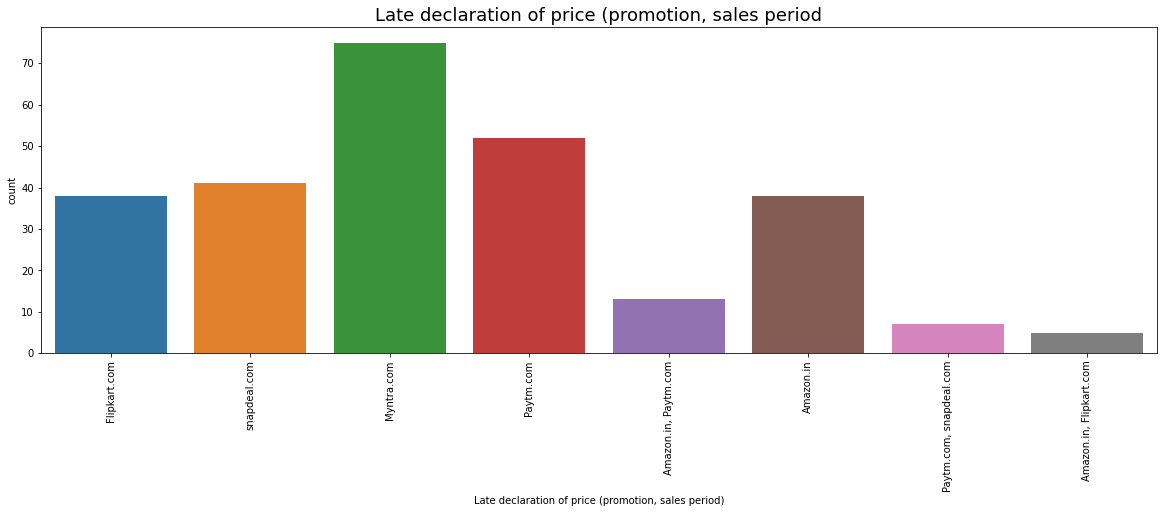

In [28]:

plt.figure(figsize=(20,6))
plt.xticks(rotation=90)
sns.countplot(x='Late declaration of price (promotion, sales period)', data=df)

plt.title('Late declaration of price (promotion, sales period',fontsize=18)
plt.show()

Amazon website would be mostly referred to the friend and then comes flipkart 
As Amazon is most reliable and most customer come back to the Amazon store which means it has more customer retention.
Amazon and Flipkart is used for online excessively and can be recommened to a friend.